## 1. Processing the raw csv

In [2]:
import pandas as pd
import os
import numpy as np

import ast


name_experiment = 'kl_exp3'

input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/raw_csv/'+name_experiment+'.csv')
data = pd.read_csv(input_csv_path)

data['value'] = data['value'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

#Take after the 6712th row
#data = data.iloc[3356:]

#Relative distance_y to the target (TX is at 10m from origin, and we recorded the position of the RX)
#data['distance_y'] = np.abs(10.0 - data['distance_y'])

data['uav38_distance_x'] = data['uav38_distance_x'].fillna(method='ffill')
data['uav39_distance_x'] = data['uav39_distance_x'].fillna(method='ffill')
data['uav38_distance_y'] = data['uav38_distance_y'].fillna(method='ffill')
data['uav39_distance_y'] = data['uav39_distance_y'].fillna(method='ffill')
data['uav38_distance_z'] = data['uav38_distance_z'].fillna(method='ffill')
data['uav39_distance_z'] = data['uav39_distance_z'].fillna(method='ffill')

data['relative_distance_y'] = np.abs(data['uav38_distance_y'] - data['uav39_distance_y'])

# Remove missing 'value'
data = data.dropna(subset=['value'])

data['num_points'] = data['value'].apply(len)

def calculate_error_rate(values):
    error_count = 0
    for value in values:
        if value not in [0.0,1.0, 2.0, 3.0]:
    #return sum(1 for value in values if value not in [1.0, 2.0, 3.0])
            error_count += 1
    
    return error_count

data['error_count'] = data['value'].apply(calculate_error_rate)

#Function to check occurrence of signal 3
def check_signal_3(values):
    return 1 if 3.0 in values else 0

#Function to check occurrence of signal 2
def check_signal_2(values):
    return 1 if 2.0 in values else 0

#Function to check occurrence of signal 1
def check_signal_1(values):
    return 1 if 1.0 in values else 0

#Function to check occurrence of signal 0
def check_signal_0(values):
    return 1 if 0.0 in values else 0




# Check if the signal 3 is still present
data['signal_3'] = data['value'].apply(check_signal_3)

# Check if the signal 2 is still present
data['signal_2'] = data['value'].apply(check_signal_2)

# Check if the signal 1 is still present
data['signal_1'] = data['value'].apply(check_signal_1)

# Check if the signal 0 is still present
data['signal_0'] = data['value'].apply(check_signal_0)


specified_distances = np.array([5, 10, 15, 20, 25, 30])

# Assigning each data point to the nearest specified distance_y
data['nearest_distance'] = specified_distances[np.abs(specified_distances[:, np.newaxis] - data['relative_distance_y'].values).argmin(axis=0)]

#Processed

cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv/'+name_experiment+'_processed.csv')


data.to_csv(cleaned_file_path, index=False)

cleaned_file_path 


data.head()




,timestamp,uav38_distance_x,uav38_distance_y,uav38_distance_z,uav39_distance_x,uav39_distance_y,uav39_distance_z,value,relative_distance_y,num_points,error_count,signal_3,signal_2,signal_1,signal_0,nearest_distance
0,1.713792e+09,NaN,NaN,NaN,NaN,NaN,NaN,"[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....",NaN,15,15,0,0,0,0,5
1,1.713792e+09,NaN,NaN,NaN,NaN,NaN,NaN,"[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....",NaN,16,16,0,0,0,0,5
2,1.713792e+09,NaN,NaN,NaN,NaN,NaN,NaN,"[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....",NaN,14,14,0,0,0,0,5
3,1.713792e+09,NaN,NaN,NaN,NaN,NaN,NaN,"[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....",NaN,13,13,0,0,0,0,5
4,1.713792e+09,NaN,NaN,NaN,NaN,NaN,NaN,"[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....",NaN,11,11,0,0,0,0,5


# Processing processed csv v2

In [7]:
import pandas as pd
import os
import numpy as np
import ast

# Experiment name
name_experiment = 'variant1_th40'
subset_rx = 'rx1_s1'

# Paths
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/paper/raw_csv/' + name_experiment + '.csv')
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/paper/processed_csv/' + name_experiment + '_'+ subset_rx +'_processed.csv')

# Read data
data = pd.read_csv(input_csv_path)
data['value'] = data['value'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
data['point_x'] = data['point_x'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
data['point_y'] = data['point_y'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Ensure the fields are lists
def ensure_list(x):
    return x if isinstance(x, list) else [x]

data['value'] = data['value'].apply(ensure_list)
data['point_x'] = data['point_x'].apply(ensure_list)
data['point_y'] = data['point_y'].apply(ensure_list)

# Define center area of the image
image_height, image_width = 480, 752
center_x_min, center_x_max = 0.2 * image_width, 0.8 * image_width
#center_x_min, center_x_max = 190, 310
#center_x_min, center_x_max = 390, 510
center_y_min, center_y_max = 0.2 * image_height, 0.8 * image_height

# Function to filter points in the center of the image
def filter_center_points(values, point_x, point_y):
    filtered_values, filtered_point_x, filtered_point_y = [], [], []
    for v, x, y in zip(values, point_x, point_y):
        if center_x_min <= x <= center_x_max and center_y_min <= y <= center_y_max:
            filtered_values.append(v)
            filtered_point_x.append(x)
            filtered_point_y.append(y)
    return filtered_values, filtered_point_x, filtered_point_y

# Apply filtering to each row
filtered_results = data.apply(
    lambda row: filter_center_points(row['value'], row['point_x'], row['point_y']), axis=1
)

# Update the DataFrame with filtered results
data['value'] = filtered_results.apply(lambda x: x[0])
data['point_x'] = filtered_results.apply(lambda x: x[1])
data['point_y'] = filtered_results.apply(lambda x: x[2])


# Fill missing values for UAV distances
uav_fields = ['uav36_distance_x', 'uav36_distance_y', 'uav36_distance_z', 
              'uav39_distance_x', 'uav39_distance_y', 'uav39_distance_z',
              'uav40_distance_x', 'uav40_distance_y', 'uav40_distance_z']

for field in uav_fields:
    data[field] = data[field].fillna(method='ffill')


# Remove rows where 'value' is empty after filtering
data = data[data['value'].str.len() > 0]

# Calculate relative distance_y
data['uav39_relative_distance_y'] = np.abs(data['uav39_distance_y'] - data['uav36_distance_y'])
data['uav40_relative_distance_y'] = np.abs(data['uav40_distance_y'] - data['uav36_distance_y'])
#data['relative_distance_y'] = np.abs(data['uav39_distance_y'] - 10)

# Calculate number of points
data['num_points'] = data['value'].apply(len)

# Error rate calculation
def calculate_error_rate(values):
    error_count = 0
    for value in values:
        if value not in [1.0, 2.0]:
            error_count += 1
    return error_count

data['error_count'] = data['value'].apply(calculate_error_rate)

# Signal occurrence functions
def check_signal_3(values):
    return 1 if 3.0 in values else 0

def check_signal_2(values):
    return 1 if 2.0 in values else 0

def check_signal_1(values):
    return 1 if 1.0 in values else 0

def check_signal_0(values):
    return 1 if 0.0 in values else 0

# Apply signal checks
#data['signal_3'] = data['value'].apply(check_signal_3)
data['signal_2'] = data['value'].apply(check_signal_2)
data['signal_1'] = data['value'].apply(check_signal_1)
#data['signal_0'] = data['value'].apply(check_signal_0)

# Assign nearest distance
specified_distances = np.array([5, 10])
#-data['nearest_distance'] = specified_distances[np.abs(specified_distances[:, np.newaxis] - data['relative_distance_y'].values).argmin(axis=0)]
#data['nearest_distance'] = specified_distances[np.abs(specified_distances[:, np.newaxis] - data['uav39_relative_distance_y'].values).argmin(axis=0)]

# Save processed data
data.to_csv(cleaned_file_path, index=False)

# Output path
cleaned_file_path

# Display the first few rows
data.head()

,timestamp,uav36_distance_x,uav36_distance_y,uav36_distance_z,uav39_distance_x,uav39_distance_y,uav39_distance_z,uav40_distance_x,uav40_distance_y,uav40_distance_z,value,point_x,point_y,uav39_relative_distance_y,uav40_relative_distance_y,num_points,error_count,signal_2,signal_1
1376,1.724156e+09,-77.141969,-0.520357,0.366521,-68.875040,0.460243,0.338301,-64.877955,-5.683457,0.501308,"[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....","[348.0, 597.0, 425.0, 601.0, 585.0, 590.0, 365...","[105.0, 161.0, 162.0, 191.0, 195.0, 197.0, 230...",0.980600,5.163101,9,9,0,0
1377,1.724156e+09,-77.141969,-0.520357,0.366521,-68.875040,0.460243,0.338301,-64.877955,-5.683457,0.501308,"[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....","[348.0, 598.0, 425.0, 601.0, 586.0, 591.0, 365...","[105.0, 162.0, 162.0, 191.0, 196.0, 196.0, 230...",0.980600,5.163101,10,10,0,0
1378,1.724156e+09,-77.141969,-0.520357,0.366521,-68.875040,0.460243,0.338301,-64.877955,-5.683457,0.501308,"[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....","[348.0, 599.0, 426.0, 586.0, 592.0, 365.0, 226...","[105.0, 162.0, 162.0, 195.0, 196.0, 230.0, 255...",0.980600,5.163101,9,9,0,0
1383,1.724156e+09,-77.141969,-0.520357,0.366521,-68.877275,0.462433,0.332170,-64.878810,-5.682561,0.506219,"[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....","[348.0, 599.0, 426.0, 586.0, 592.0, 366.0, 227...","[105.0, 162.0, 161.0, 195.0, 196.0, 230.0, 255...",0.982790,5.162204,10,10,0,0
1393,1.724156e+09,-77.143600,-0.516343,0.382294,-68.879600,0.464704,0.337649,-64.879362,-5.681900,0.509828,"[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....","[348.0, 600.0, 427.0, 587.0, 592.0, 366.0, 227...","[105.0, 162.0, 162.0, 195.0, 196.0, 229.0, 255...",0.981047,5.165557,12,12,0,0


In [2]:
import pandas as pd
import os
import numpy as np
import ast

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the file paths and thresholds
file_paths = [
    '/home/rivermar/Desktop/MRS_Master_Project/paper/processed_csv_automation_adaptive/variant01_adaptive_otsu_invalid_processed.csv',
    '/home/rivermar/Desktop/MRS_Master_Project/paper/processed_csv_automation_adaptive/variant01_adaptive_otsu_valid_processed.csv',
    '/home/rivermar/Desktop/MRS_Master_Project/paper/processed_csv_automation_adaptive/variant01_adaptive_otsu_valid_c4_d5_mxs50_processed.csv',
    '/home/rivermar/Desktop/MRS_Master_Project/paper/processed_csv_automation_adaptive/variant01_adaptive_otsu_c4_d4_mxs15_processed.csv',
    '/home/rivermar/Desktop/MRS_Master_Project/paper/processed_csv_automation_adaptive/variant01_adaptive_otsu_c4_d5_mxs15_processed.csv',
    '/home/rivermar/Desktop/MRS_Master_Project/paper/processed_csv_automation_adaptive/variant01_adaptive_otsu_c5_d5_mxs15_processed.csv',
    '/home/rivermar/Desktop/MRS_Master_Project/paper/processed_csv_automation_adaptive/variant01_adaptive_otsu_processed.csv',
    '/home/rivermar/Desktop/MRS_Master_Project/paper/processed_csv_automation_adaptive/variant01_adaptive_kl_processed.csv',
    '/home/rivermar/Desktop/MRS_Master_Project/paper/processed_csv_automation_adaptive/variant01_adaptive_otsu_c4_d5_mxs15_invalids_processed.csv',



]




thresholds = [40, 60, 80, 100, 120, 160, 200]
keys = ['invalid', 'valid', 'valid_4_5_50', 'valid_4_4_15', 'valid_4_5_15', 'valid_5_5_,15','otsu', 'kl','valid_4_5_15_invalids']

# Initialize a dataframe to hold the summarized data
summary_data = {
    'Key': [],
    'Total Errors Signal 1': [],
    'Total Errors Signal 2': [],
    'Total Instances Signal 1': [],
    'Total Instances Signal 2': [],
    'Error Rate Signal 1': [],
    'Error Rate Signal 2': [],
    'Percentage Fully Present Signal 1': [],
    'Percentage Fully Present Signal 2': [],
    'Combined Error Rate': [],
    'Max Error Rate': [],
    'Error Rate Difference (S2 - S1)': [],
    'Relative Error Rate Difference (%)': []
}

# Loop through the files and calculate the required metrics
for path, key in zip(file_paths, keys):
    # Load the data
    df = pd.read_csv(path)
    
    # Calculate total errors for each signal
    total_errors_signal_1 = df['num_errors_signal_1'].sum()
    total_errors_signal_2 = df['num_errors_signal_2'].sum()

    # Calculate total instances signal present
    total_signal_1 = df['num_points_signal_1'].sum()
    total_signal_2 = df['num_points_signal_2'].sum()

    # Calculate error rates
    error_rate_signal_1 = total_errors_signal_1 / total_signal_1 if total_signal_1 != 0 else 0
    error_rate_signal_2 = total_errors_signal_2 / total_signal_2 if total_signal_2 != 0 else 0

    # Calculate percentage fully present based on number of errors
    total_entries = len(df)
    fully_present_signal_1 = (df['num_errors_signal_1'] == 0).sum() / total_entries * 100
    fully_present_signal_2 = (df['num_errors_signal_2'] == 0).sum() / total_entries * 100

    # Append the data to the summary
    summary_data['Key'].append(key)
    summary_data['Total Errors Signal 1'].append(total_errors_signal_1)
    summary_data['Total Errors Signal 2'].append(total_errors_signal_2)
    summary_data['Total Instances Signal 1'].append(total_signal_1)
    summary_data['Total Instances Signal 2'].append(total_signal_2)
    summary_data['Error Rate Signal 1'].append(error_rate_signal_1)
    summary_data['Error Rate Signal 2'].append(error_rate_signal_2)
    summary_data['Percentage Fully Present Signal 1'].append(fully_present_signal_1)
    summary_data['Percentage Fully Present Signal 2'].append(fully_present_signal_2)

# After looping, calculate performance differences and optimization metrics
for i in range(len(summary_data['Key'])):
    error_rate_diff = summary_data['Error Rate Signal 2'][i] - summary_data['Error Rate Signal 1'][i]
    relative_error_diff = (error_rate_diff / summary_data['Error Rate Signal 1'][i]) * 100 if summary_data['Error Rate Signal 1'][i] != 0 else 0
    combined_error_rate = summary_data['Error Rate Signal 1'][i] + summary_data['Error Rate Signal 2'][i]
    max_error_rate = max(summary_data['Error Rate Signal 1'][i], summary_data['Error Rate Signal 2'][i])
    
    summary_data['Error Rate Difference (S2 - S1)'].append(error_rate_diff)
    summary_data['Relative Error Rate Difference (%)'].append(relative_error_diff)
    summary_data['Combined Error Rate'].append(combined_error_rate)
    summary_data['Max Error Rate'].append(max_error_rate)

# Convert summary data to DataFrame
df_summary = pd.DataFrame(summary_data)

# Find the optimal threshold based on combined error rate and max error rate
optimal_combined_threshold = df_summary.loc[df_summary['Combined Error Rate'].idxmin(), 'Key']
optimal_max_threshold = df_summary.loc[df_summary['Max Error Rate'].idxmin(), 'Key']

# Save the summary to a CSV file
df_summary.to_csv('threshold_analysis_summary_adaptive.csv', index=False)

# Output the optimal thresholds
print(f'Optimal Threshold based on Combined Error Rate: {optimal_combined_threshold}')
print(f'Optimal Threshold based on Max Error Rate: {optimal_max_threshold}')

# Optionally, you can include the plotting code here for visualization if desired

Optimal Threshold based on Combined Error Rate: valid_4_5_15
Optimal Threshold based on Max Error Rate: valid_4_5_15


## Processing of multiple UAVs


In [ ]:

""" indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))
 """

In [18]:
variant1_th40_rx1 = os.path.expanduser('~/Desktop/MRS_Master_Project/paper/processed_csv_automation/variant1_th40_rx1_s1_processed.csv')
data_variant01_th40_rx1 = pd.read_csv(variant1_th40_rx1)
data_variant01_th40_rx1 = data.iloc[4997:20240]

variant1_th40_rx2 = os.path.expanduser('~/Desktop/MRS_Master_Project/paper/processed_csv_automation/variant1_th40_rx2_s2_processed.csv')
data_variant01_th40_rx2 = pd.read_csv(variant1_th40_rx2)
data_variant01_th40_rx2 = data.iloc[4997:16663]

variant1_th60_rx1 = os.path.expanduser('~/Desktop/MRS_Master_Project/paper/processed_csv_automation/variant1_th60_rx1_s1_processed.csv')
data_variant01_th60_rx1 = pd.read_csv(variant1_th60_rx1)
data_variant01_th60_rx1 = data.iloc[4997:20240]

variant1_th60_rx2 = os.path.expanduser('~/Desktop/MRS_Master_Project/paper/processed_csv_automation/variant1_th60_rx2_s2_processed.csv')
data_variant01_th60_rx2 = pd.read_csv(variant1_th60_rx2)
data_variant01_th60_rx2 = data.iloc[4997:16663]

print(len(data_variant01_th60_rx2))


11666


In [65]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/standard_exp3_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

#Take after the 6712th row
data = data.iloc[376:13954]


indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))


data_standard = data


2444
2094
2100
2098
2094
2748


In [66]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/otsu_exp3_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

#Take after the 6712th row
#data = data.iloc[1839:31760]
data = data.iloc[1736:15611]

indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))

data_otsu_adaptive = data

2618
2096
2096
2097
2095
2873


In [67]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/kl_exp3_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

#Take after the 6712th row
#data = data.iloc[1928:31760]
data = data.iloc[1180:15134]


indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))

data_kl_adaptive = data

2605
2091
2097
2096
2096
2969


In [68]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/otsu_exp3_ex500_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

#Take after the 6712th row
#data = data.iloc[1793:31760]
data = data.iloc[582:13610]

indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))


data_adaptive_ex500 = data

2296
2087
2099
2089
2101
2356


In [69]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/kl_exp3_ex500_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

#Take after the 6712th row
#data = data.iloc[1994:31760]
data = data.iloc[921:14504]

indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))


data_kl_adaptive_ex500 = data

2689
2095
2096
2095
2099
2509


In [70]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/standard_exp3_ex500_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

#Take after the 6712th row
#data = data.iloc[1999:31760]
data = data.iloc[792:15999]

indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))


data_standard_ex500 = data

3868
2096
2103
2101
2086
2953


In [71]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/otsu_exp3_heading_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

#Take after the 6712th row
#data = data.iloc[1793:31760]
data = data.iloc[1602:18043]

indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))


data_adaptive_heading = data

5874
2099
2098
2095
2099
2176


In [72]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/kl_exp3_heading_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

#Take after the 6712th row
#data = data.iloc[1793:31760]
data = data.iloc[419:14218]

indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))


data_kl_adaptive_heading = data

3102
2096
2100
2091
2101
2309


In [73]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/standard_exp3_heading_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

#Take after the 6712th row
#data = data.iloc[1793:31760]
#819
data = data.iloc[1600:14120]

indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))


data_standard_heading = data

2022
2097
2096
2097
2096
2112


In [74]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv/otsu_exp1_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)

data = data.iloc[6712:]


#8258
#Trim 3500 rows before the 8258th row
#data = data.iloc[3500:]


indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))

data_otsu_adaptive_exp1 = data


2405
5735
17545
3500
3500
28061


In [75]:
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/otsu_exp1_processed.csv')
specified_distances = np.array([5, 10, 15, 20, 25, 30])



data = pd.read_csv(cleaned_file_path)



#8258
#Trim 3500 rows before the 8258th row
#data = data.iloc[3500:]


indices_5 = data[data['nearest_distance'] == 5].index

indices_10 = data[data['nearest_distance'] == 10].index

indices_15 = data[data['nearest_distance'] == 15].index

indices_20 = data[data['nearest_distance'] == 20].index

indices_25 = data[data['nearest_distance'] == 25].index

indices_30 = data[data['nearest_distance'] == 30].index


print(len(indices_5))
print(len(indices_10))
print(len(indices_15))
print(len(indices_20))
print(len(indices_25))
print(len(indices_30))

data_otsu_adaptive_exp1_2 = data

6403
7528
10508
2095
2097
7701


In [17]:
import pandas as pd
import os
import numpy as np

import ast


input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/raw_csv/otsu_multiple_topics.csv')
data = pd.read_csv(input_csv_path)

#Ensure that the 'value' column is a list
data['value'] = data['value'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

#Relative distance to the target (TX is at 10m from origin, and we recorded the position of the RX)
data['distance_x'] = 10.0 - data['distance_x']

data['distance_x'] = data['distance_x'].fillna(method='ffill')

# Remove missing 'value'
data = data.dropna(subset=['value'])

#Add a column for the number of points in each row
data['num_points'] = data['value'].apply(len)


def calculate_error_rate(values):
    error_count = 0
    for value in values:
        if value not in [1.0, 2.0, 3.0]:
    #return sum(1 for value in values if value not in [1.0, 2.0, 3.0])
            error_count += 1
    
    return error_count

data['error_count'] = data['value'].apply(calculate_error_rate)

#Function to check occurrence of signal 3
def check_signal_3(values):
    return 1 if 3.0 in values else 0

#Function to check occurrence of signal 2
def check_signal_2(values):
    return 1 if 2.0 in values else 0

#Function to check occurrence of signal 1
def check_signal_1(values):
    return 1 if 1.0 in values else 0


# Check if the signal 3 is still present
data['signal_3'] = data['value'].apply(check_signal_3)

# Check if the signal 2 is still present
data['signal_2'] = data['value'].apply(check_signal_2)

# Check if the signal 1 is still present
data['signal_1'] = data['value'].apply(check_signal_1)


specified_distances = np.array([5, 8, 11, 14, 17, 20])

# Assigning each data point to the nearest specified distance
data['nearest_distance'] = specified_distances[np.abs(specified_distances[:, np.newaxis] - data['distance_x'].values).argmin(axis=0)]

# Save the cleaned data to a new CSV file
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/processed_csv/otsu_multiple_topics_processed.csv')

data.to_csv(cleaned_file_path, index=False)

cleaned_file_path 


data.head()

,timestamp,distance_x,value,num_points,error_count,signal_3,signal_2,signal_1,nearest_distance
1,145.308,8.070875,"[9.0, 11.0]",2,2,0,0,0,8
3,145.316,8.070875,"[1.0, 3.0, 5.0, 4.0, 7.0]",5,3,1,0,1,8
5,145.328,8.070875,"[9.0, 11.0]",2,2,0,0,0,8
6,145.336,8.070875,"[1.0, 3.0, 5.0, 4.0, 7.0]",5,3,1,0,1,8
8,145.344,8.070875,"[9.0, 11.0]",2,2,0,0,0,8


## Loading the static measurments datasets

In [18]:
#Loading the data
import pandas as pd
import os
import numpy as np


""" # Load the data of threshold 50
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_standard_th_50_v2_processed.csv')
data_static_50 = pd.read_csv(input_csv_path)
data_static_50.head(5)

# Load the data of threshold 100 
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_standard_th_100_v2_1_processed.csv')
data_static_100 = pd.read_csv(input_csv_path)

# Load the data of threshold 150
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_standard_th_150_v2_processed.csv')
data_static_150 = pd.read_csv(input_csv_path)

# Load the data of threshold 200
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_standard_th_200_v2_processed.csv')
data_static_200 = pd.read_csv(input_csv_path)
data_static_200.head(5)

 
#Load the data of adaptive
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_kl_adaptive_v2_processed.csv')
data_static_kl_adaptive = pd.read_csv(input_csv_path)
data_static_kl_adaptive.head(5)

#Load the data of otsu adaptive
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_otsu_adaptive_v2_processed.csv')
data_static_otsu_adaptive = pd.read_csv(input_csv_path)
data_static_otsu_adaptive.head(5) 
 """



input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv/otsu_exp3_processed.csv')
data_otsu_adaptive = pd.read_csv(input_csv_path)
data_otsu_adaptive.head(5)

#Data for the standard
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv/standard_exp3_processed.csv')
data_standard = pd.read_csv(input_csv_path)
data_standard.head(5)





,timestamp,uav38_distance_x,uav38_distance_y,uav38_distance_z,uav39_distance_x,uav39_distance_y,uav39_distance_z,value,relative_distance_y,num_points,error_count,signal_3,signal_2,signal_1,signal_0,nearest_distance
0,1.713793e+09,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,0,0,0,0,0,0,5
1,1.713793e+09,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,0,0,0,0,0,0,5
2,1.713793e+09,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,0,0,0,0,0,0,5
3,1.713793e+09,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,0,0,0,0,0,0,5
4,1.713793e+09,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,0,0,0,0,0,0,5


## Adaptive Otsu Thresholding (1000us)

In [76]:
#Summarizing the frequency of data otsu adaptive

otsu_adaptive_summary = data_otsu_adaptive.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
otsu_adaptive_summary['error_rate'] = otsu_adaptive_summary['total_errors'] / otsu_adaptive_summary['total_entries']
otsu_adaptive_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,7854,564,0.071811
1,10,6288,542,0.086196
2,15,6424,3538,0.550747
3,20,6348,4645,0.731727
4,25,6492,6373,0.981670
5,30,8657,8650,0.999191


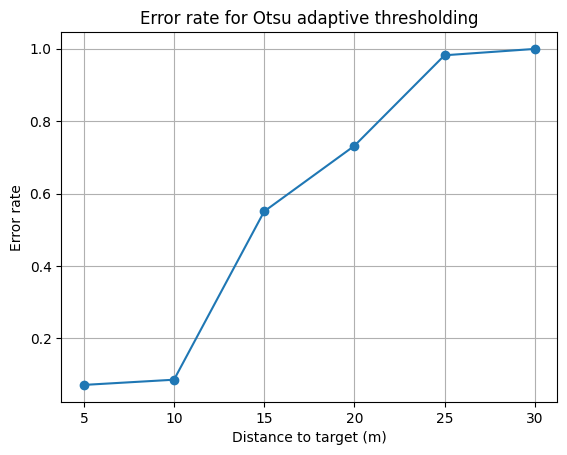

In [77]:
#Plotting the error rate for otsu adaptive
import matplotlib.pyplot as plt

plt.plot(otsu_adaptive_summary['nearest_distance'], otsu_adaptive_summary['error_rate'], marker='o')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for Otsu adaptive thresholding')
plt.grid()
plt.show()


In [78]:
#Summarizing the frequency of data otsu adaptive

otsu_adaptive_summary = data_otsu_adaptive.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
otsu_adaptive_summary['error_rate'] = otsu_adaptive_summary['total_errors'] / otsu_adaptive_summary['total_entries']
otsu_adaptive_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,7854,564,0.071811
1,10,6288,542,0.086196
2,15,6424,3538,0.550747
3,20,6348,4645,0.731727
4,25,6492,6373,0.981670
5,30,8657,8650,0.999191


## Adaptive KL-Divergence Minimization (1000us)

In [79]:
#Summarizing the frequency of data otsu adaptive

kl_adaptive_summary = data_kl_adaptive.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
kl_adaptive_summary['error_rate'] = kl_adaptive_summary['total_errors'] / kl_adaptive_summary['total_entries']
kl_adaptive_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,7842,754,0.096149
1,10,6685,1061,0.158714
2,15,9135,5945,0.650794
3,20,6846,6115,0.893222
4,25,6378,6367,0.998275
5,30,9109,9101,0.999122


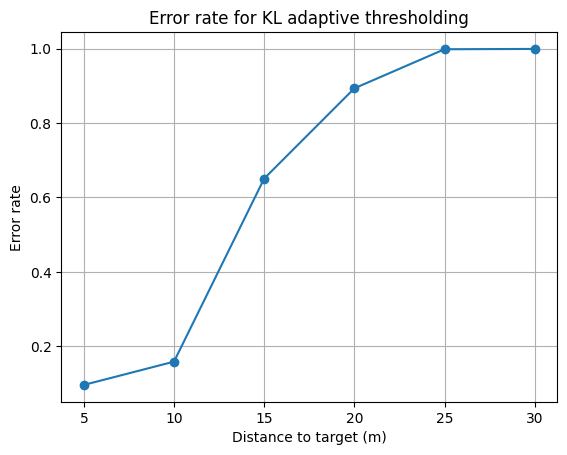

In [80]:
#Plotting the error rate for kl adaptive
import matplotlib.pyplot as plt

plt.plot(kl_adaptive_summary['nearest_distance'], kl_adaptive_summary['error_rate'], marker='o')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for KL adaptive thresholding')
plt.grid()
plt.show()


In [24]:
#Summarizing the frequency of data otsu adaptive

kl_adaptive_summary = data_kl_adaptive.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
kl_adaptive_summary['error_rate'] = kl_adaptive_summary['total_errors'] / kl_adaptive_summary['total_entries']
kl_adaptive_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,7842,754,0.096149
1,10,6685,1061,0.158714
2,15,9135,5945,0.650794
3,20,6846,6115,0.893222
4,25,6378,6367,0.998275
5,30,9109,9101,0.999122


## Static Thresholding (1000us)

In [81]:
#Summarizing the frequency of standard data

standard_summary = data_standard.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
standard_summary['error_rate'] = standard_summary['total_errors'] / standard_summary['total_entries']
standard_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,7332,579,0.078969
1,10,6282,506,0.080548
2,15,6325,3537,0.559209
3,20,4817,4690,0.973635
4,25,4266,4236,0.992968
5,30,4643,4475,0.963816


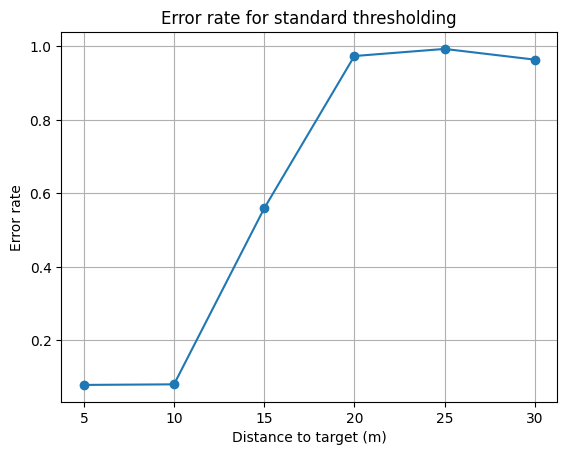

In [82]:
#Plot error rate for standard
import matplotlib.pyplot as plt

plt.plot(standard_summary['nearest_distance'], standard_summary['error_rate'], marker='o')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for standard thresholding')
plt.grid()
plt.show()



In [83]:
#Summarizing the frequency of standard data

standard_summary = data_standard.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
standard_summary['error_rate'] = standard_summary['total_errors'] / standard_summary['total_entries']
standard_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,7332,579,0.078969
1,10,6282,506,0.080548
2,15,6325,3537,0.559209
3,20,4817,4690,0.973635
4,25,4266,4236,0.992968
5,30,4643,4475,0.963816


## Adaptive Otsu Thresholding (500us)

In [85]:
#Summarizing the frequency of data otsu adaptive

otsu_adaptive_ex500_summary = data_adaptive_ex500.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
otsu_adaptive_ex500_summary['error_rate'] = otsu_adaptive_ex500_summary['total_errors'] / otsu_adaptive_ex500_summary['total_entries']
otsu_adaptive_ex500_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,6888,373,0.054152
1,10,6261,274,0.043763
2,15,6346,1534,0.241727
3,20,6483,5575,0.859941
4,25,6410,6338,0.988768
5,30,6881,6797,0.987792


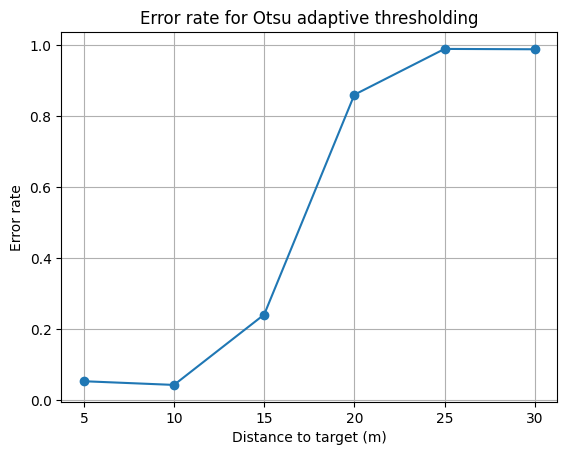

In [86]:
#Plotting the error rate for otsu adaptive
import matplotlib.pyplot as plt

plt.plot(otsu_adaptive_ex500_summary['nearest_distance'], otsu_adaptive_ex500_summary['error_rate'], marker='o')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for Otsu adaptive thresholding')
plt.grid()
plt.show()


In [87]:
#Summarizing the frequency of data otsu adaptive

otsu_adaptive_ex500_summary = data_adaptive_ex500.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
otsu_adaptive_ex500_summary['error_rate'] = otsu_adaptive_ex500_summary['total_errors'] / otsu_adaptive_ex500_summary['total_entries']
otsu_adaptive_ex500_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,6888,373,0.054152
1,10,6261,274,0.043763
2,15,6346,1534,0.241727
3,20,6483,5575,0.859941
4,25,6410,6338,0.988768
5,30,6881,6797,0.987792


## Adaptive KL-Divergence Minimization (500us)

In [88]:
#Summarizing the frequency of data otsu adaptive

kl_adaptive_ex500_summary = data_kl_adaptive_ex500.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
kl_adaptive_ex500_summary['error_rate'] = kl_adaptive_ex500_summary['total_errors'] / kl_adaptive_ex500_summary['total_entries']
kl_adaptive_ex500_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,9596,2098,0.218633
1,10,7451,1447,0.194202
2,15,8109,4945,0.609816
3,20,6767,6585,0.973105
4,25,6204,6110,0.984848
5,30,7374,7238,0.981557


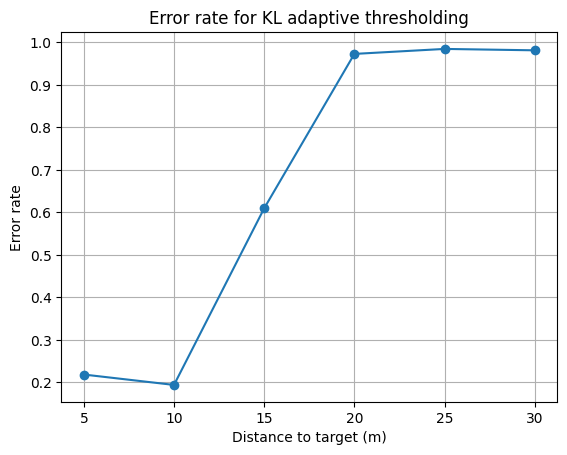

In [89]:
#Plotting the error rate for kl adaptive
import matplotlib.pyplot as plt

plt.plot(kl_adaptive_ex500_summary['nearest_distance'], kl_adaptive_ex500_summary['error_rate'], marker='o')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for KL adaptive thresholding')
plt.grid()
plt.show()


In [90]:
#Summarizing the frequency of data otsu adaptive

kl_adaptive_ex500_summary = data_kl_adaptive_ex500.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
kl_adaptive_ex500_summary['error_rate'] = kl_adaptive_ex500_summary['total_errors'] / kl_adaptive_ex500_summary['total_entries']
kl_adaptive_ex500_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,9596,2098,0.218633
1,10,7451,1447,0.194202
2,15,8109,4945,0.609816
3,20,6767,6585,0.973105
4,25,6204,6110,0.984848
5,30,7374,7238,0.981557


## Static thresholding (500us)

In [91]:
#Summarizing the frequency of data otsu adaptive

standard_ex500_summary = data_standard_ex500.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
standard_ex500_summary['error_rate'] = standard_ex500_summary['total_errors'] / standard_ex500_summary['total_entries']
standard_ex500_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,11648,688,0.059066
1,10,6288,263,0.041826
2,15,6231,3714,0.596052
3,20,4203,3826,0.910302
4,25,2108,1464,0.694497
5,30,2968,2944,0.991914


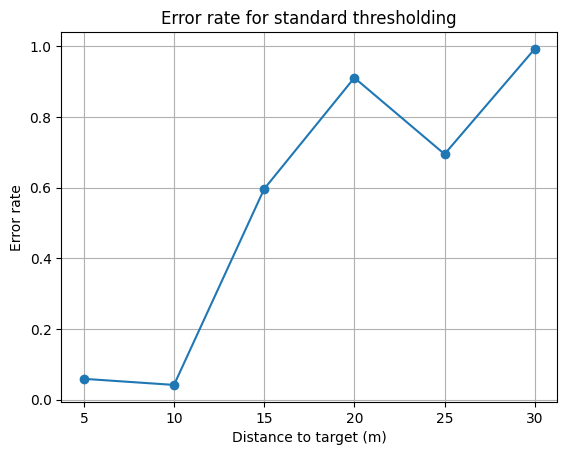

In [92]:
#Plot error rate for standard
import matplotlib.pyplot as plt

plt.plot(standard_ex500_summary['nearest_distance'], standard_ex500_summary['error_rate'], marker='o')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for standard thresholding')
plt.grid()
plt.show()


In [36]:
#Summarizing the frequency of data otsu adaptive

standard_ex500_summary = data_standard_ex500.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
standard_ex500_summary['error_rate'] = standard_ex500_summary['total_errors'] / standard_ex500_summary['total_entries']
standard_ex500_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,11648,688,0.059066
1,10,6288,263,0.041826
2,15,6231,3714,0.596052
3,20,4203,3826,0.910302
4,25,2108,1464,0.694497
5,30,2968,2944,0.991914


## Results from night adaptive method

In [37]:
#Summarizing the frequency of data otsu adaptive

kl_adaptive_summary_exp1 = data_kl_exp1.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
kl_adaptive_summary_exp1['error_rate'] = kl_adaptive_summary_exp1['total_errors'] / kl_adaptive_summary_exp1['total_entries']
kl_adaptive_summary_exp1

,nearest_distance,total_entries,total_errors,error_rate
0,5,3298,1024,0.310491
1,10,9184,2033,0.221363
2,15,6324,998,0.157812
3,20,6384,6024,0.943609
4,25,6131,6104,0.995596
5,30,8948,8948,1.000000


In [38]:
#Summarizing the frequency of data otsu adaptive

otsu_adaptive_summary_exp1_2 = data_otsu_adaptive_exp1_2.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
otsu_adaptive_summary_exp1_2['error_rate'] = otsu_adaptive_summary_exp1_2['total_errors'] / otsu_adaptive_summary_exp1_2['total_entries']
otsu_adaptive_summary_exp1_2

,nearest_distance,total_entries,total_errors,error_rate
0,5,18528,3905,0.210762
1,10,22555,1758,0.077943
2,15,31788,3168,0.099660
3,20,6672,5685,0.852068
4,25,6546,6359,0.971433
5,30,22766,22643,0.994597


In [39]:
#Summarizing the frequency of data otsu adaptive

otsu_adaptive_summary_exp1 = data_otsu_adaptive_exp1.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
otsu_adaptive_summary_exp1['error_rate'] = otsu_adaptive_summary_exp1['total_errors'] / otsu_adaptive_summary_exp1['total_entries']
otsu_adaptive_summary_exp1

,nearest_distance,total_entries,total_errors,error_rate
0,5,3639,407,0.111844
1,10,8725,988,0.113238
2,15,26407,2093,0.079259
3,20,5250,309,0.058857
4,25,5305,411,0.077474
5,30,38511,35394,0.919062


# Heading experiments

In [93]:
#Summarizing the frequency of data otsu adaptive

otsu_adaptive_summary_heading = data_adaptive_heading.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
otsu_adaptive_summary_heading['error_rate'] = otsu_adaptive_summary_heading['total_errors'] / otsu_adaptive_summary_heading['total_entries']
otsu_adaptive_summary_heading



,nearest_distance,total_entries,total_errors,error_rate
0,5,16914,10882,0.643372
1,10,6232,4285,0.687580
2,15,6193,4251,0.686420
3,20,5086,3067,0.603028
4,25,4339,2440,0.562342
5,30,4706,3610,0.767106


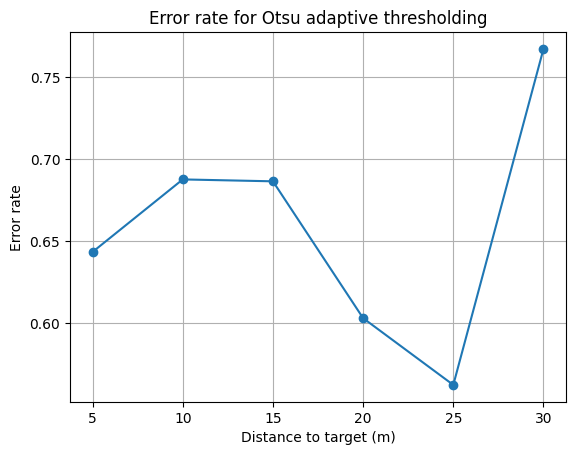

In [94]:
#Plotting the error rate for otsu adaptive
import matplotlib.pyplot as plt

plt.plot(otsu_adaptive_summary_heading['nearest_distance'], otsu_adaptive_summary_heading['error_rate'], marker='o')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for Otsu adaptive thresholding')
plt.grid()
plt.show()


In [95]:
#Summarizing the frequency of data otsu adaptive

kl_adaptive_summary_heading = data_kl_adaptive_heading.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
kl_adaptive_summary_heading['error_rate'] = kl_adaptive_summary_heading['total_errors'] / kl_adaptive_summary_heading['total_entries']
kl_adaptive_summary_heading


,nearest_distance,total_entries,total_errors,error_rate
0,5,9625,5467,0.568000
1,10,6240,4286,0.686859
2,15,6148,4223,0.686890
3,20,5201,3397,0.653144
4,25,4499,3927,0.872861
5,30,4837,4725,0.976845


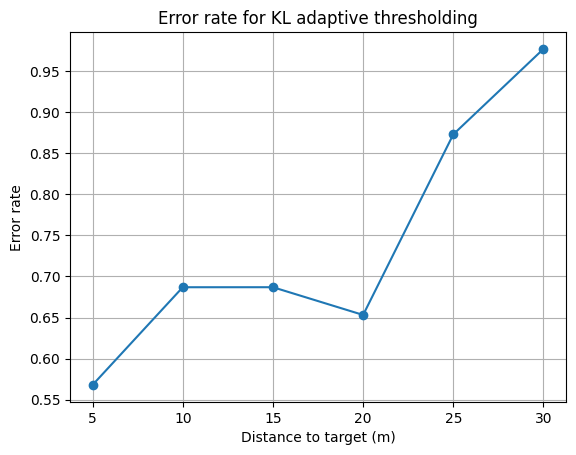

In [96]:
#Plotting the error rate for otsu adaptive
import matplotlib.pyplot as plt

plt.plot(kl_adaptive_summary_heading['nearest_distance'], kl_adaptive_summary_heading['error_rate'], marker='o')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for KL adaptive thresholding')
plt.grid()
plt.show()

In [97]:
#Summarizing the frequency of data otsu adaptive

standard_summary_heading = data_standard_heading.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
standard_summary_heading['error_rate'] = standard_summary_heading['total_errors'] / standard_summary_heading['total_entries']
standard_summary_heading

,nearest_distance,total_entries,total_errors,error_rate
0,5,6026,837,0.138898
1,10,4194,2259,0.538627
2,15,4192,2162,0.515744
3,20,4197,2369,0.564451
4,25,4353,3895,0.894785
5,30,3304,3156,0.955206


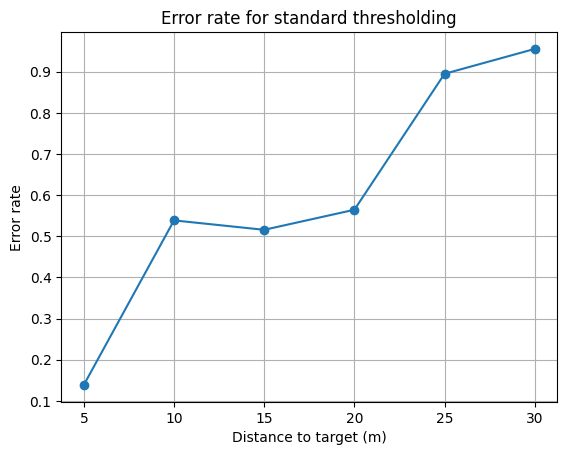

In [98]:
#Plot error rate for standard
import matplotlib.pyplot as plt

plt.plot(standard_summary_heading['nearest_distance'], standard_summary_heading['error_rate'], marker='o')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for standard thresholding')
plt.grid()
plt.show()


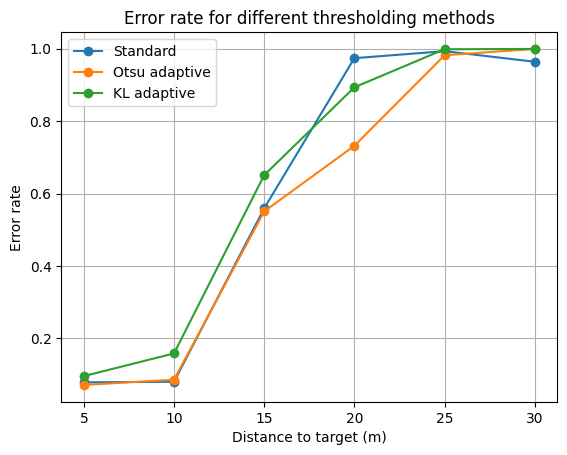

In [99]:
#Plot all the error rates for the different thresholding methods together

plt.plot(standard_summary['nearest_distance'], standard_summary['error_rate'], marker='o', label='Standard')
plt.plot(otsu_adaptive_summary['nearest_distance'], otsu_adaptive_summary['error_rate'], marker='o', label='Otsu adaptive')
plt.plot(kl_adaptive_summary['nearest_distance'], kl_adaptive_summary['error_rate'], marker='o', label='KL adaptive')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for different thresholding methods')
plt.legend()
plt.grid()
plt.show()


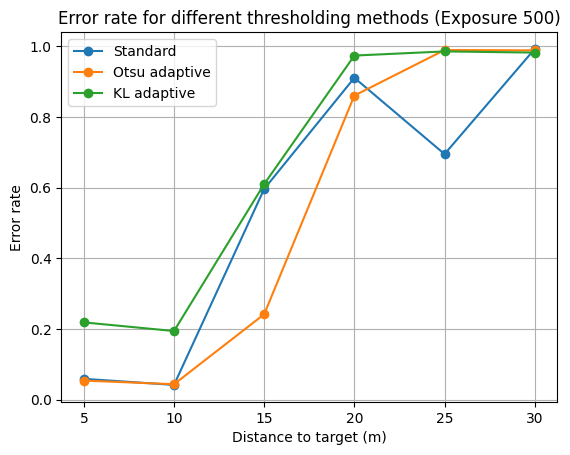

In [100]:
#Plot all the error rates for the different thresholding methods together for ex500

plt.plot(standard_ex500_summary['nearest_distance'], standard_ex500_summary['error_rate'], marker='o', label='Standard')
plt.plot(otsu_adaptive_ex500_summary['nearest_distance'], otsu_adaptive_ex500_summary['error_rate'], marker='o', label='Otsu adaptive')
plt.plot(kl_adaptive_ex500_summary['nearest_distance'], kl_adaptive_ex500_summary['error_rate'], marker='o', label='KL adaptive')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for different thresholding methods (Exposure 500)')
plt.legend()
plt.grid()
plt.show()




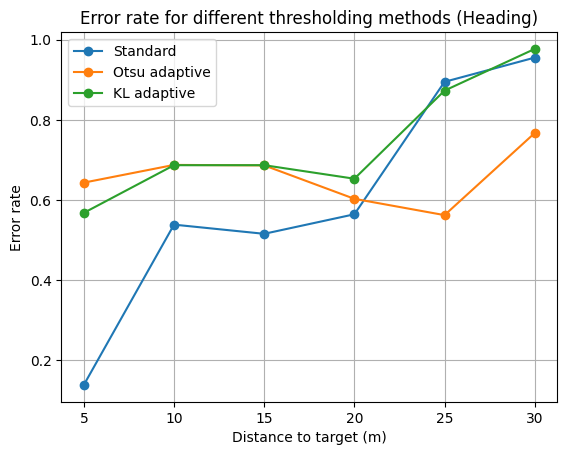

In [102]:
#Plot all the error rates for the different thresholding methods together for heading

plt.plot(standard_summary_heading['nearest_distance'], standard_summary_heading['error_rate'], marker='o', label='Standard')
plt.plot(otsu_adaptive_summary_heading['nearest_distance'], otsu_adaptive_summary_heading['error_rate'], marker='o', label='Otsu adaptive')
plt.plot(kl_adaptive_summary_heading['nearest_distance'], kl_adaptive_summary_heading['error_rate'], marker='o', label='KL adaptive')
plt.xlabel('Distance to target (m)')
plt.ylabel('Error rate')
plt.title('Error rate for different thresholding methods (Heading)')
plt.legend()
plt.grid()
plt.show()


## Loading the dynamic measurments datasets

In [49]:



# Load the data of threshold 50
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/dynamic_standard_th_50_processed.csv')
data_dynamic_50 = pd.read_csv(input_csv_path)
data_dynamic_50.head(5)

# Load the data of threshold 100
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/dynamic_standard_th_100_v2_processed.csv')
data_dynamic_100_v2 = pd.read_csv(input_csv_path)
data_dynamic_100_v2.head(5)

#Load the data of threshold 150
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/dynamic_standard_th_150_processed.csv')
data_dynamic_150 = pd.read_csv(input_csv_path)
data_dynamic_150.head(5)

# Load the data dynamic threshold 200
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/dynamic_standard_th_200_processed.csv')
data_dynamic_200 = pd.read_csv(input_csv_path)
data_dynamic_200.head(5)


#Load the data of kl adaptive
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/kl_dynamic_adaptive_processed.csv')
data_dynamic_kl_adaptive = pd.read_csv(input_csv_path)
data_dynamic_kl_adaptive.head(5)

#Load the data of otsu adaptive
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/otsu_dynamic_adaptive_processed.csv')
data_dynamic_otsu_adaptive = pd.read_csv(input_csv_path)
data_dynamic_otsu_adaptive.head(5)





FileNotFoundError: [Errno 2] No such file or directory: '/home/rivermar/Desktop/MRS_Master_Project/rosbags/simulation/dynamic_standard_th_50_processed.csv'

In [ ]:
#Summarizing the frequency of errors for threshold 50
th_50_summary_static = data_static_50.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
th_50_summary_static['error_rate'] = th_50_summary_static['total_errors'] / th_50_summary_static['total_entries']
th_50_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,8603,8041,0.934674
1,8,8503,7861,0.924497
2,11,8518,7736,0.908194
3,14,6897,6698,0.971147
4,17,5824,5596,0.960852
5,20,5442,5303,0.974458


In [ ]:
#Summarizing the frequency of errors for threshold 100
th_100_summary_static = data_static_100.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
th_100_summary_static['error_rate'] = th_100_summary_static['total_errors'] / th_100_summary_static['total_entries']
th_100_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,10749,746,0.069402
1,8,10692,1350,0.126263
2,11,10710,1080,0.100840
3,14,8383,4570,0.545151
4,17,7151,3927,0.549154
5,20,6850,5086,0.742482


In [ ]:
#Summarizing the frequency of errors for threshold 150
th_150_summary_static = data_static_150.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
th_150_summary_static['error_rate'] = th_150_summary_static['total_errors'] / th_150_summary_static['total_entries']
th_150_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,10749,791,0.073588
1,8,10725,1202,0.112075
2,11,10748,587,0.054615
3,14,8322,5012,0.602259
4,17,7181,3867,0.538504
5,20,6731,4985,0.740603


In [ ]:
#Summarizing the frequency of errors for threshold 200
th_200_summary_static = data_static_200.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
th_200_summary_static['error_rate'] = th_200_summary_static['total_errors'] / th_200_summary_static['total_entries']
th_200_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,10698,1333,0.124603
1,8,10701,1386,0.129521
2,11,10739,736,0.068535
3,14,8693,4470,0.514207
4,17,7132,3963,0.555665
5,20,6951,4701,0.676306


In [ ]:
#Summarizing the frequency of errors for kl adaptive
kl_adaptive_summary_static = data_static_kl_adaptive.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
kl_adaptive_summary_static['error_rate'] = kl_adaptive_summary_static['total_errors'] / kl_adaptive_summary_static['total_entries']
kl_adaptive_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,10751,704,0.065482
1,8,10770,634,0.058867
2,11,10730,866,0.080708
3,14,10722,750,0.069950
4,17,10681,3096,0.289860
5,20,10531,9050,0.859368


In [ ]:
heading_0_4_summary_static = data.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
heading_0_4_summary_static['error_rate'] = heading_0_4_summary_static['total_errors'] / heading_0_4_summary_static['total_entries']
heading_0_4_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,10776,385,0.035728
1,8,9583,1883,0.196494
2,11,7426,3982,0.536224
3,14,7161,3871,0.540567


In [ ]:
# Summarizing the frequency of errors for threshold 200
th_200_summary_dynamic = data_dynamic.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
th_200_summary_dynamic

,nearest_distance,total_entries,total_errors,error_rate
0,5,13218,794,0.060070
1,8,7368,423,0.057410
2,11,7369,400,0.054281
3,14,7354,2934,0.398967
4,17,7362,3763,0.511138
5,20,7452,3809,0.511138


In [ ]:
#Summarizing the frequency of errors for adaptive
adaptive_summary = data_static_adaptive.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
adaptive_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,6586,229,0.034771
1,8,6591,208,0.031558
2,11,6582,278,0.042236
3,14,6577,249,0.037859
4,17,6583,1457,0.221328
5,20,6579,3578,0.543852


In [ ]:
#Summarizing the frequency of errors for kl adaptive
kl_adaptive_summary = data_dynamic_kl_adaptive.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
kl_adaptive_summary


,nearest_distance,total_entries,total_errors,error_rate
0,5,10524,344,0.032687
1,8,221,39,0.176471
2,11,13136,359,0.027329
3,14,6958,267,0.038373
4,17,6924,2206,0.318602
5,20,2060,1175,0.570388


In [ ]:
#Summarizing the frequency of errors for otsu adaptive
otsu_adaptive_summary = data_static_otsu_adaptive.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
otsu_adaptive_summary


,nearest_distance,total_entries,total_errors,error_rate
0,5,6552,98,0.014957
1,8,6563,161,0.024531
2,11,6574,63,0.009583
3,14,6563,97,0.014780
4,17,6564,1589,0.242078
5,20,6563,3567,0.543501


In [ ]:
#Summarizing the frequency of errors for otsu adaptive
otsu_adaptive_summary_dynamic = data_dynamic_otsu_adaptive.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
otsu_adaptive_summary_dynamic


,nearest_distance,total_entries,total_errors,error_rate
0,5,4356,105,0.024105
1,8,7345,249,0.033901
2,11,7355,147,0.019986
3,14,7342,187,0.025470
4,17,7354,2425,0.329753
5,20,7201,3941,0.547285


In [ ]:
#Create a csv with all summaries
summary_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_dynamic_standard_summaries.csv')
summaries = [th_50_summary_static, th_50_summary_dynamic, th_100_v2_summary_static, th_100_v2_summary_dynamic, th_150_summary_static, th_150_summary_dynamic, th_200_summary_static, th_200_summary_dynamic]
summary = pd.concat(summaries, axis=0)
summary.to_csv(summary_file_path, index=False)

summary_file_path # Return the path to the new CSV and display the first few rows of the cleaned data.

'/home/rivermar/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_dynamic_standard_summaries.csv'

In [ ]:
#Summarizing the frequency of errors for otsu adaptive

#Take only the rows after the 6712th row
data_static_otsu_adaptive_i = data_static_otsu_adaptive.iloc[23251:]
otsu_adaptive_summary_static = data_static_otsu_adaptive_i.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
otsu_adaptive_summary_static['error_rate'] = otsu_adaptive_summary_static['total_errors'] / otsu_adaptive_summary_static['total_entries']
otsu_adaptive_summary_static


,nearest_distance,total_entries,total_errors,error_rate
0,5,3252,315,0.096863
1,10,5338,678,0.127014
2,15,5250,368,0.070095
3,20,5250,309,0.058857
4,25,5305,411,0.077474
5,30,38511,35394,0.919062


In [ ]:
#Summarizing the frequency of errors for kl adaptive

#Take only the rows after the 6712th row
data_static_kl_adaptive_i = data_static_kl_adaptive.iloc[0:]
kl_adaptive_summary_static = data_static_kl_adaptive_i.groupby('nearest_distance').agg(
    total_entries=pd.NamedAgg(column='num_points', aggfunc='sum'),
    total_errors=pd.NamedAgg(column='error_count', aggfunc='sum'),
).reset_index()

# Calculate the error rate for each 'nearest_distance' group
kl_adaptive_summary_static['error_rate'] = kl_adaptive_summary_static['total_errors'] / kl_adaptive_summary_static['total_entries']
kl_adaptive_summary_static




,nearest_distance,total_entries,total_errors,error_rate
0,5,5012,2936,0.585794
1,10,5290,485,0.091682
2,15,5282,543,0.102802
3,20,5250,1782,0.339429
4,25,5336,5051,0.946589
5,30,15082,15058,0.998409


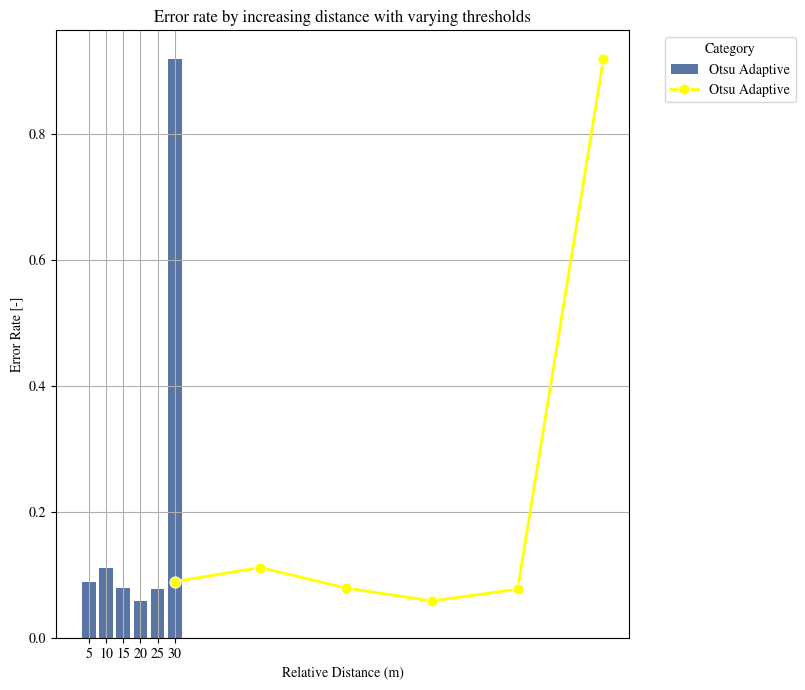

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Set the font to a serif font, like Times New Roman
#mpl.rcParams['font.family'] = 'cmu_serif'
#mpl.rcParams['mathtext.fontset'] = 'cm'
# Alternatively, for LaTeX typesetting (for truly academic appearance)
#mpl.rcParams['text.usetex'] = True
#mpl.rcdefaults()
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'



# Add a new column to each DataFrame to label the category before combining
""" th_200_summary_dynamic['category'] = 'Dynamic (Threshold = 200)'
th_100_v2_summary_dynamic['category'] = 'Dynamic (Threshold = 100)'
th_150_summary_dynamic['category'] = 'Dynamic (Threshold = 150)'
th_50_summary_dynamic['category'] = 'Dynamic (Threshold = 50)'
th_200_summary_static['category'] = 'Static (Threshold = 200)'
th_100_v2_summary_static['category'] = 'Static (Threshold = 100)'
th_150_summary_static['category'] = 'Static (Threshold = 150)'
th_50_summary_static['category'] = 'Static (Threshold = 50)'
adaptive_summary['category'] = 'KL-Adaptive' """
otsu_adaptive_summary_static['category'] = 'Otsu Adaptive'
""" kl_adaptive_summary['category'] = 'Dynamic KL-Adaptive'
otsu_adaptive_summary_dynamic['category'] = 'Dynamic Otsu Adaptive' """


#Just otsu adaptive
combined_data = otsu_adaptive_summary_static

""" 
# Combine all the DataFrames into one
combined_data = pd.concat([
    th_200_summary_dynamic,
    th_100_v2_summary_dynamic,
    th_150_summary_dynamic,
    th_50_summary_dynamic,
    th_200_summary_static,
    th_100_v2_summary_static,
    th_150_summary_static,
    th_50_summary_static,
    adaptive_summary,
    otsu_adaptive_summary,
    kl_adaptive_summary,
    otsu_adaptive_summary_dynamic

]) """


plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)

# Adjusted barplot with hue
sns.barplot(data=combined_data, x='nearest_distance', y='error_rate', hue='category', palette='deep')

plt.title('Error rate by increasing distance with varying thresholds')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')


""" # Bar plot
plt.subplot(1, 2, 1)
sns.barplot(data=th_200_summary_dynamic, x='nearest_distance', y='error_rate', color='royalblue', label='Dynamic (Threshold = 200)')

#Include the threshold 100 data
sns.barplot(data=th_100_summary_dynamic, x='nearest_distance', y='error_rate', color='green', label='Dynamic (Threshold = 100)')

#Include the threshold 150 data
sns.barplot(data=th_150_summary_dynamic, x='nearest_distance', y='error_rate', color='pink', label='Dynamic (Threshold = 150)')

#Include the threshold 50 data
sns.barplot(data=th_50_summary_dynamic, x='nearest_distance', y='error_rate', color='gray', label='Dynamic (Threshold = 50)')

#Add the static data
sns.barplot(data=th_200_summary_static, x='nearest_distance', y='error_rate', color='red', label='Static (Threshold = 200)')

#Include the threshold 100 data
sns.barplot(data=th_100_summary_static, x='nearest_distance', y='error_rate', color='orange', label='Static (Threshold = 100)')

#Include the threshold 150 data
sns.barplot(data=th_150_summary_static, x='nearest_distance', y='error_rate', color='purple', label='Static (Threshold = 150)')

#Include the threshold 50 data
sns.barplot(data=th_50_summary_static, x='nearest_distance', y='error_rate', color='black', label='Static (Threshold = 50)')


plt.title('Error rate by increasing distance (Threshold = 200)')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]') """

""" # Line plot
plt.subplot(1, 2, 2)
sns.lineplot(data=th_200_summary_dynamic, x='nearest_distance', y='error_rate', marker='o', color='royalblue', linewidth=2, markersize=8, label='Dynamic (Threshold = 200)')

#Include the threshold 100 data
sns.lineplot(data=th_100_v2_summary_dynamic, x='nearest_distance', y='error_rate', marker='o', color='green', linewidth=2, markersize=8, label='Dynamic (Threshold = 100)')

#Include the threshold 150 data
sns.lineplot(data=th_150_summary_dynamic, x='nearest_distance', y='error_rate', marker='o', color='pink', linewidth=2, markersize=8, label='Dynamic (Threshold = 150)')

#Include the threshold 50 data
sns.lineplot(data=th_50_summary_dynamic, x='nearest_distance', y='error_rate', marker='o', color='gray', linewidth=2, markersize=8, label='Dynamic (Threshold = 50)')

#Add the static data
sns.lineplot(data=th_200_summary_static, x='nearest_distance', y='error_rate', marker='o', color='red', linewidth=2, markersize=8, label='Static (Threshold = 200)')

#Include the threshold 100 data
sns.lineplot(data=th_100_v2_summary_static, x='nearest_distance', y='error_rate', marker='o', color='orange', linewidth=2, markersize=8, label='Static (Threshold = 100)')

#Include the threshold 150 data
sns.lineplot(data=th_150_summary_static, x='nearest_distance', y='error_rate', marker='o', color='purple', linewidth=2, markersize=8, label='Static (Threshold = 150)')

#Include the threshold 50 data
sns.lineplot(data=th_50_summary_static, x='nearest_distance', y='error_rate', marker='o', color='black', linewidth=2, markersize=8, label='Static (Threshold = 50)')

#Add the adaptive data
sns.lineplot(data=adaptive_summary, x='nearest_distance', y='error_rate', marker='o', color='brown', linewidth=2, markersize=8, label='Adaptive')

#Add the kl adaptive data
sns.lineplot(data=kl_adaptive_summary, x='nearest_distance', y='error_rate', marker='o', color='green', linewidth=2, markersize=8, label='KL Adaptive') """

#Add the otsu adaptive data

sns.lineplot(data=otsu_adaptive_summary_static, x='nearest_distance', y='error_rate', marker='o', color='yellow', linewidth=2, markersize=8, label='Otsu Adaptive')

""" #Add the otsu adaptive data

sns.lineplot(data=otsu_adaptive_summary_dynamic, x='nearest_distance', y='error_rate', marker='o', color='blue', linewidth=2, markersize=8, label='Dynamic Otsu Adaptive') """



#Move label to the top left
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Error rate by increasing distance with varying thresholds')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np


# Specified relative distances
#specified_distances = np.array([5, 8, 11, 14, 17, 20])

# Assigning each data point to the nearest specified distance
#data['nearest_distance'] = specified_distances[np.abs(specified_distances[:, np.newaxis] - data['distance_x'].values).argmin(axis=0)]

# Summarizing the frequency of errors for these specified distances
specified_distance_summary = data.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})

specified_distance_summary

# Summarizing the frequency of errors for these specified distances
specified_distance_summary_static = data_static.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})

specified_distance_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,6150,3016,0.490407
1,8,6141,3036,0.494382
2,11,6163,2829,0.459030
3,14,6151,4916,0.799220
4,17,6142,5955,0.969554
5,20,6120,5997,0.979902


## Signal presence through trajectory

In [ ]:
## Real world

# Calculating the overall presence of each signal in both datasets
overall_presence_adaptive = 3[['signal_0','signal_1', 'signal_3']].mean()
overall_presence_standard = data_standard[['signal_0','signal_1', 'signal_3']].mean()
overall_presence_adaptive_kl = data_kl_adaptive[['signal_0','signal_1', 'signal_3']].mean()

# Comparing the average distance for which each signal is detected
average_distance_adaptive = data_otsu_adaptive.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()
average_distance_standard = data_standard.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()
average_distance_adaptive_kl = data_kl_adaptive.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()

#Print as a table the overall presence of each signal in the three datasets
print(overall_presence_adaptive)
print(overall_presence_standard)
print(overall_presence_adaptive_kl)

#Print as a table the average distance for which each signal is detected
print(average_distance_adaptive)





#overall_presence_adaptive, overall_presence_standard, average_distance_adaptive, average_distance_standard, overall_presence_adaptive_kl, average_distance_adaptive_kl

signal_0    0.583640
signal_1    0.349622
signal_3    0.346090
dtype: float64
signal_0    0.345191
signal_1    0.387539
signal_3    0.418324
dtype: float64
signal_0    0.494267
signal_1    0.309517
signal_3    0.389494
dtype: float64
   signal_0  signal_1  signal_3  relative_distance_y
0         0         0         0            25.909918
1         0         1         0            19.699417
2         0         1         1            10.188406
3         1         0         0            17.798402
4         1         0         1            14.992198
5         1         1         0            10.939843
6         1         1         1             7.881407


In [140]:
#grouping by distance and calculating the signal presence rate

data_otsu_adaptive['rounded_distance'] = data_otsu_adaptive['relative_distance_y'].round()

#Otsu number of points per distance
otsu_num_points_1000 = data_otsu_adaptive.groupby('rounded_distance')['num_points'].mean().reset_index()

#grouping by distance and calculating the signal presence rate

data_kl_adaptive['rounded_distance'] = data_kl_adaptive['relative_distance_y'].round()
#KL number of points per distance
kl_num_points_1000 = data_kl_adaptive.groupby('rounded_distance')['num_points'].mean().reset_index()

#standard

data_standard['rounded_distance'] = data_standard['relative_distance_y'].round()
#Standard number of points per distance
standard_num_points_1000 = data_standard.groupby('rounded_distance')['num_points'].mean().reset_index()



In [141]:
#otsu_num_points, kl_num_points, standard_num_points
otsu_num_points_1000, kl_num_points_1000, standard_num_points_1000


(    rounded_distance  num_points
 0                5.0    3.000000
 1                6.0    3.000000
 2                7.0    3.000000
 3                8.0    3.000000
 4                9.0    3.000000
 5               10.0    3.000000
 6               11.0    3.000000
 7               12.0    3.000000
 8               13.0    3.118644
 9               14.0    3.096774
 10              15.0    3.066343
 11              16.0    3.000000
 12              17.0    3.000000
 13              18.0    3.000000
 14              19.0    3.000000
 15              20.0    3.028017
 16              21.0    3.000000
 17              22.0    3.086207
 18              23.0    3.051724
 19              24.0    3.213115
 20              25.0    3.097140
 21              26.0    3.169231
 22              27.0    3.000000
 23              28.0    3.000000
 24              29.0    3.206897
 25              30.0    3.009434,
     rounded_distance  num_points
 0                5.0    3.010883
 1           

In [ ]:
otsu_detected_describe= otsu_num_points['num_points'].describe()
""" kl_num_points['num_points'].describe()
standard_num_points['num_points'].describe() """
kl_detected_describe = kl_num_points['num_points'].describe()
standard_detected_describe = standard_num_points['num_points'].describe()

otsu_detected_describe, kl_detected_describe, standard_detected_describe



(count    26.000000
 mean      3.043982
 std       0.067773
 min       3.000000
 25%       3.000000
 50%       3.000000
 75%       3.081241
 max       3.213115
 Name: num_points, dtype: float64,
 count    26.000000
 mean      3.487335
 std       0.649236
 min       2.666667
 25%       3.002721
 50%       3.134321
 75%       4.102732
 max       4.919355
 Name: num_points, dtype: float64,
 count    26.000000
 mean      2.537869
 std       0.528230
 min       1.622951
 25%       2.125868
 50%       2.825000
 75%       3.000000
 max       3.118644
 Name: num_points, dtype: float64)

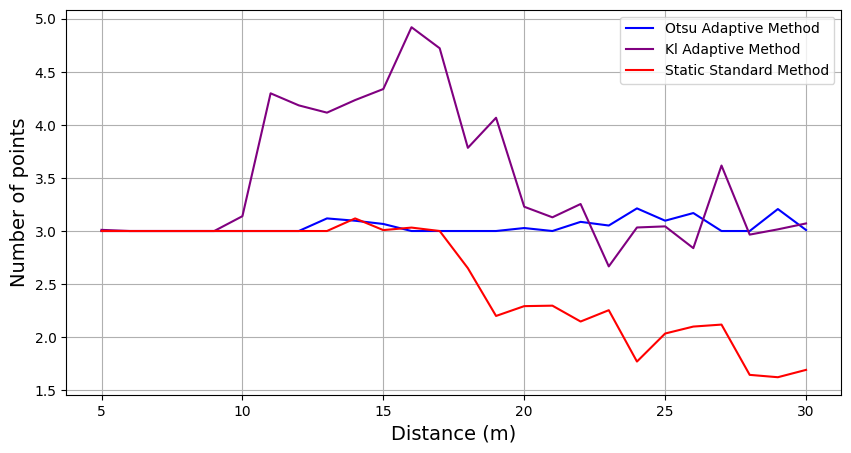

In [166]:
import matplotlib.pyplot as plt
import numpy as np

#Plot for the number of points per distance
plt.figure(figsize=(10, 5))
plt.plot(otsu_num_points_1000['rounded_distance'], otsu_num_points_1000['num_points'], label='Otsu Adaptive Method', color='blue')
plt.plot(kl_num_points_1000['rounded_distance'], kl_num_points_1000['num_points'], label='Kl Adaptive Method', color='purple')
plt.plot(standard_num_points_1000['rounded_distance'], standard_num_points_1000['num_points'], label='Static Standard Method', color='red')
#plt.title('Detected Points with increasing distance')
plt.xlabel('Distance (m)', fontsize=14)
plt.ylabel('Number of points', fontsize=14)
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
otsu_detected= data_otsu_adaptive.groupby(otsu_num_points['num_points'])['rounded_distance'].mean().reset_index()
otsu_detected

,num_points,rounded_distance


In [131]:
## Real world

import pandas as pd

adaptive_df = pd.read_csv('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/otsu_exp3_processed.csv')

kl_adaptive_df = pd.read_csv('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/kl_exp3_processed.csv')

standard_df = pd.read_csv('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv_2/standard_exp3_processed.csv')

# Drop rows with NaN distances if any
adaptive_df_clean = adaptive_df.dropna(subset=['uav38_distance_x'])
adaptive_df_clean = adaptive_df.dropna(subset=['uav38_distance_y'])
adaptive_df_clean = adaptive_df.dropna(subset=['uav38_distance_z'])

adaptive_df_clean = adaptive_df.dropna(subset=['uav39_distance_x'])
adaptive_df_clean = adaptive_df.dropna(subset=['uav39_distance_y'])
adaptive_df_clean = adaptive_df.dropna(subset=['uav39_distance_z'])


standard_df_clean = standard_df.dropna(subset=['uav38_distance_x'])
standard_df_clean = standard_df.dropna(subset=['uav38_distance_y'])
standard_df_clean = standard_df.dropna(subset=['uav38_distance_z'])

standard_df_clean = standard_df.dropna(subset=['uav39_distance_x'])
standard_df_clean = standard_df.dropna(subset=['uav39_distance_y'])
standard_df_clean = standard_df.dropna(subset=['uav39_distance_z'])

kl_adaptive_df_clean = kl_adaptive_df.dropna(subset=['uav38_distance_x'])
kl_adaptive_df_clean = kl_adaptive_df.dropna(subset=['uav38_distance_y'])
kl_adaptive_df_clean = kl_adaptive_df.dropna(subset=['uav38_distance_z'])

kl_adaptive_df_clean = kl_adaptive_df.dropna(subset=['uav39_distance_x'])
kl_adaptive_df_clean = kl_adaptive_df.dropna(subset=['uav39_distance_y'])
kl_adaptive_df_clean = kl_adaptive_df.dropna(subset=['uav39_distance_z'])




# Calculating the overall presence of each signal in both datasets
overall_presence_adaptive = adaptive_df[['signal_0','signal_1', 'signal_3']].mean()
overall_presence_standard = standard_df[['signal_0','signal_1', 'signal_3']].mean()
overall_presence_adaptive_kl = kl_adaptive_df[['signal_0','signal_1', 'signal_3']].mean()

# Comparing the average distance for which each signal is detected
average_distance_adaptive = adaptive_df.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()
average_distance_standard = standard_df.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()
average_distance_adaptive_kl = kl_adaptive_df.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()

overall_presence_adaptive, overall_presence_adaptive_kl, overall_presence_standard, average_distance_adaptive, average_distance_standard, overall_presence_adaptive_kl, average_distance_adaptive_kl

(signal_0    0.567101
 signal_1    0.334379
 signal_3    0.349231
 dtype: float64,
 signal_0    0.466478
 signal_1    0.293585
 signal_3    0.367170
 dtype: float64,
 signal_0    0.354764
 signal_1    0.385127
 signal_3    0.414650
 dtype: float64,
    signal_0  signal_1  signal_3  relative_distance_y
 0         0         0         0            24.313126
 1         0         0         1             0.439850
 2         0         1         0            20.337818
 3         0         1         1             8.870278
 4         1         0         0            16.540979
 5         1         0         1             2.991894
 6         1         1         0             8.554462
 7         1         1         1             7.332727,
    signal_0  signal_1  signal_3  relative_distance_y
 0         0         0         0            23.816085
 1         0         0         1            19.672967
 2         0         1         0            16.757231
 3         0         1         1            14.8

In [132]:
#grouping by distance and calculating the signal presence rate

data_otsu_adaptive['rounded_distance'] = data_otsu_adaptive['relative_distance_y'].round()

otsu_signal_presence_by_distance_1000 = data_otsu_adaptive.groupby('rounded_distance')[['signal_0','signal_1', 'signal_3']].mean().reset_index()

#grouping by distance and calculating the signal presence rate

data_kl_adaptive['rounded_distance'] = data_kl_adaptive['relative_distance_y'].round()

kl_signal_presence_by_distance_1000 = data_kl_adaptive.groupby('rounded_distance')[['signal_0','signal_1', 'signal_3']].mean().reset_index()

data_standard['rounded_distance'] = data_standard['relative_distance_y'].round()

standard_signal_presence_by_distance_1000 = data_standard.groupby('rounded_distance')[['signal_0','signal_1', 'signal_3']].mean().reset_index()




In [133]:
otsu_signal_presence_by_distance_1000

,rounded_distance,signal_0,signal_1,signal_3
0,5.0,0.923508,0.928314,0.922307
1,6.0,1.000000,1.000000,1.000000
2,7.0,1.000000,1.000000,1.000000
3,8.0,1.000000,1.000000,1.000000
4,9.0,1.000000,1.000000,1.000000
5,10.0,0.925108,0.925108,0.921336
6,11.0,1.000000,1.000000,1.000000
7,12.0,0.322034,0.423729,0.254237
8,13.0,1.000000,0.711864,0.694915
9,14.0,1.000000,0.467742,0.467742


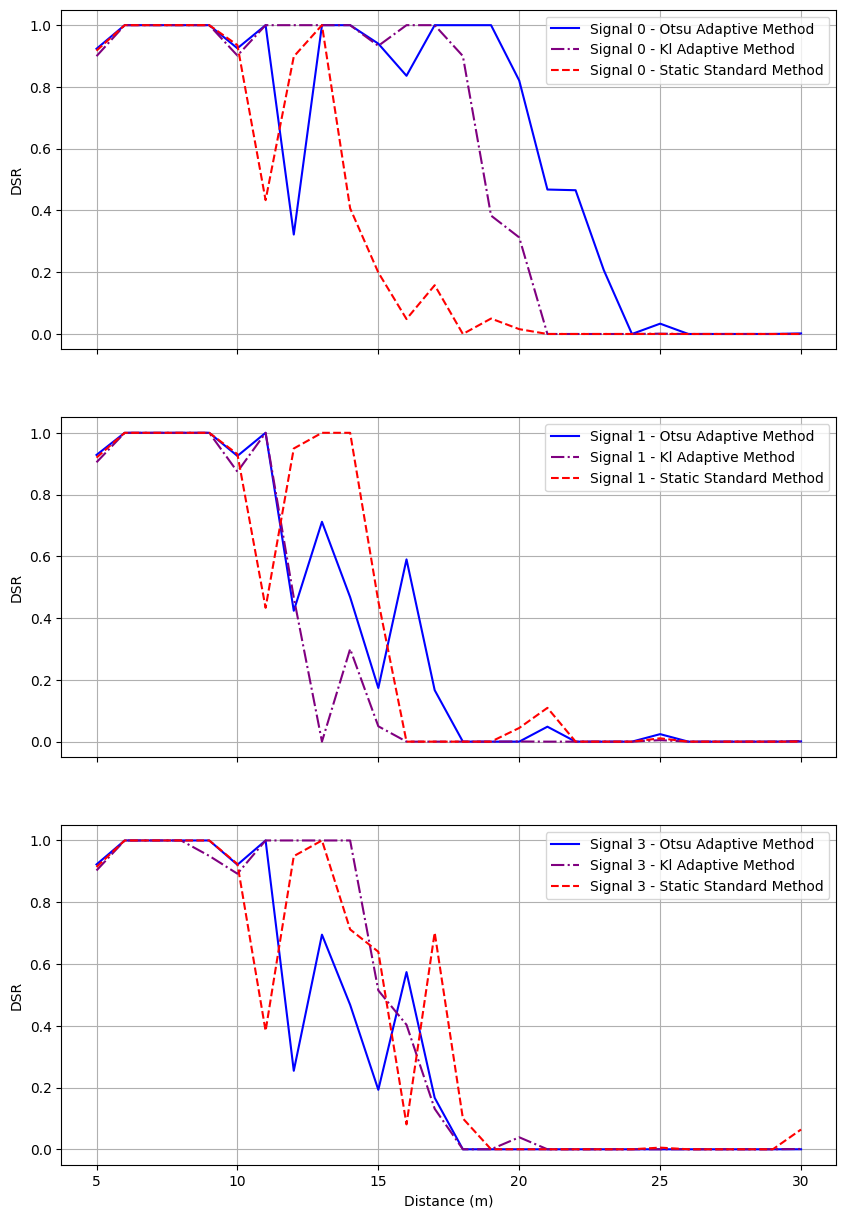

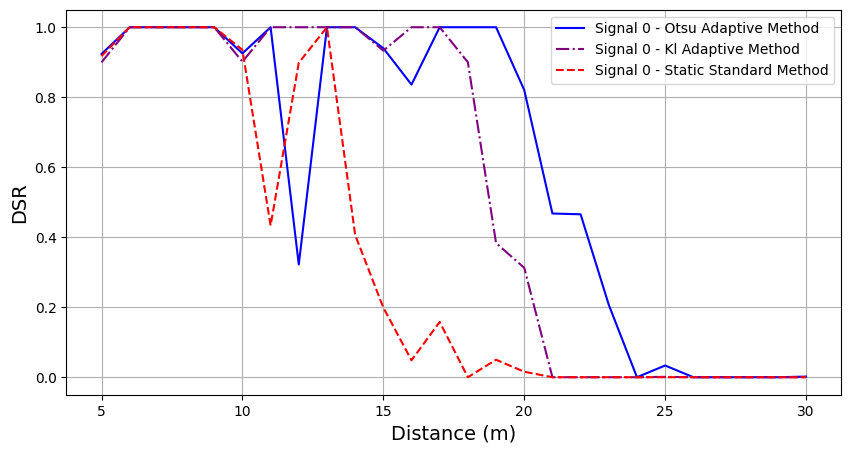

In [165]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
#fig.suptitle('Comparison of Signal Presence by Distance for Three Methods (Exposure 1000)', fontsize=16)

signals = ['signal_0','signal_1', 'signal_3']
colors = ['blue', 'green','purple']
labels = ['Signal 0','Signal 1', 'Signal 3']
method_names = ['Otsu Adaptive Method','Kl Adaptive Method', 'Static Standard Method']

# ignal presence for each signal
for i, signal in enumerate(signals):
    x_otsu = np.array(otsu_signal_presence_by_distance_1000['rounded_distance'])
    y_otsu = np.array(otsu_signal_presence_by_distance_1000[signal])
    x_kl = np.array(kl_signal_presence_by_distance_1000['rounded_distance'])
    y_kl = np.array(kl_signal_presence_by_distance_1000[signal])
    x_standard = np.array(standard_signal_presence_by_distance_1000['rounded_distance'])
    y_standard = np.array(standard_signal_presence_by_distance_1000[signal])
    
    axes[i].plot(x_otsu, y_otsu, color='blue', label=f'{labels[i]} - {method_names[0]}')
    axes[i].plot(x_kl, y_kl, '-.', color='purple', label=f'{labels[i]} - {method_names[1]}')
    axes[i].plot(x_standard, y_standard, '--', color='red', label=f'{labels[i]} - {method_names[2]}')
    axes[i].set_ylabel('DSR')
    axes[i].legend(loc='best')
    axes[i].grid(True)

axes[-1].set_xlabel('Distance (m)')

plt.show()

#Plot only the signal 0 presence
plt.figure(figsize=(10, 5))
plt.plot(otsu_signal_presence_by_distance_1000['rounded_distance'], otsu_signal_presence_by_distance_1000['signal_0'], label='Signal 0 - Otsu Adaptive Method', color='blue')
plt.plot(kl_signal_presence_by_distance_1000['rounded_distance'], kl_signal_presence_by_distance_1000['signal_0'], label='Signal 0 - Kl Adaptive Method', color='purple', linestyle='-.')
plt.plot(standard_signal_presence_by_distance_1000['rounded_distance'], standard_signal_presence_by_distance_1000['signal_0'], label='Signal 0 - Static Standard Method', color='red', linestyle='--')
#plt.title('Signal 0 Presence with increasing distance')
plt.xlabel('Distance (m)', fontsize=14)
plt.ylabel('DSR', fontsize=14)
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Heading 

In [167]:
## Real world

# Calculating the overall presence of each signal in both datasets
overall_presence_adaptive = data_adaptive_heading[['signal_0','signal_1', 'signal_3']].mean()
overall_presence_standard = data_standard_heading[['signal_0','signal_1', 'signal_3']].mean()
overall_presence_adaptive_kl = data_kl_adaptive_heading[['signal_0','signal_1', 'signal_3']].mean()

# Comparing the average distance for which each signal is detected
average_distance_adaptive = data_adaptive_heading.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()
average_distance_standard = data_standard_heading.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()
average_distance_adaptive_kl = data_kl_adaptive_heading.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()

overall_presence_adaptive, overall_presence_standard, overall_presence_adaptive_kl, average_distance_adaptive, average_distance_standard, overall_presence_adaptive_kl, average_distance_adaptive_kl

(signal_0    0.731768
 signal_1    0.010766
 signal_3    0.164528
 dtype: float64,
 signal_0    0.594329
 signal_1    0.125399
 signal_3    0.205831
 dtype: float64,
 signal_0    0.631785
 signal_1    0.034858
 signal_3    0.096094
 dtype: float64,
    signal_0  signal_1  signal_3  relative_distance_y
 0         0         0         0            16.396630
 1         0         0         1             5.730414
 2         0         1         0            10.609841
 3         0         1         1             5.088808
 4         1         0         0            15.901874
 5         1         0         1             8.968409
 6         1         1         1             4.986820,
    signal_0  signal_1  signal_3  relative_distance_y
 0         0         0         0            25.342967
 1         0         0         1            25.501587
 2         0         1         0            16.247306
 3         1         0         0            14.400171
 4         1         0         1            12.2

In [168]:
#grouping by distance and calculating the signal presence rate

data_adaptive_heading['rounded_distance'] = data_adaptive_heading['relative_distance_y'].round()

#Otsu number of points per distance
otsu_num_points_1000_heading = data_adaptive_heading.groupby('rounded_distance')['num_points'].mean().reset_index()

#grouping by distance and calculating the signal presence rate

data_kl_adaptive_heading['rounded_distance'] = data_kl_adaptive_heading['relative_distance_y'].round()
#KL number of points per distance
kl_num_points_1000_heading= data_kl_adaptive_heading.groupby('rounded_distance')['num_points'].mean().reset_index()

#standard

data_standard_heading['rounded_distance'] = data_standard_heading['relative_distance_y'].round()
#Standard number of points per distance
standard_num_points_1000_heading = data_standard_heading.groupby('rounded_distance')['num_points'].mean().reset_index()

In [169]:
otsu_detected_describe= otsu_num_points_1000_heading['num_points'].describe()
""" kl_num_points['num_points'].describe()
standard_num_points['num_points'].describe() """
kl_detected_describe = kl_num_points_1000_heading['num_points'].describe()
standard_detected_describe = standard_num_points_1000_heading['num_points'].describe()

otsu_detected_describe, kl_detected_describe, standard_detected_describe

(count    26.000000
 mean      2.544386
 std       0.390222
 min       2.000000
 25%       2.213946
 50%       2.501803
 75%       2.964984
 max       3.000000
 Name: num_points, dtype: float64,
 count    26.000000
 mean      2.615356
 std       0.397927
 min       2.000000
 25%       2.209158
 50%       2.721751
 75%       2.974802
 max       3.112752
 Name: num_points, dtype: float64,
 count    26.000000
 mean      2.065684
 std       0.278535
 min       1.545363
 25%       2.000000
 50%       2.000000
 75%       2.075482
 max       3.006309
 Name: num_points, dtype: float64)

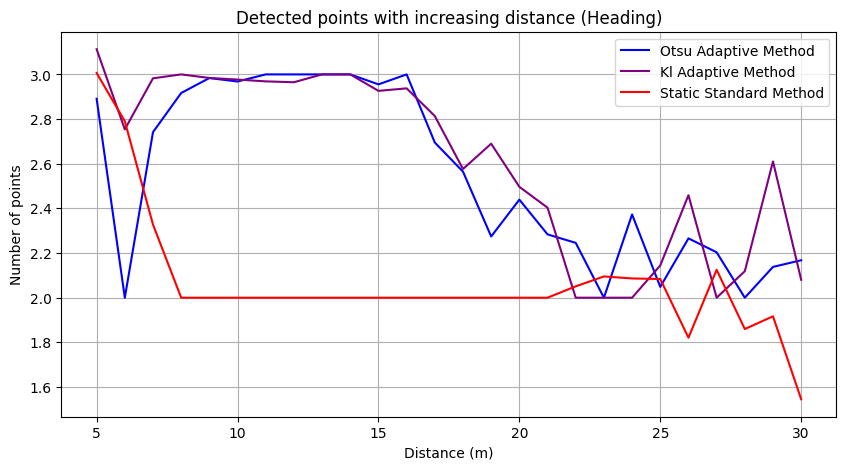

In [170]:
import matplotlib.pyplot as plt
import numpy as np

#Plot for the number of points per distance
plt.figure(figsize=(10, 5))
plt.plot(otsu_num_points_1000_heading['rounded_distance'], otsu_num_points_1000_heading['num_points'], label='Otsu Adaptive Method', color='blue')
plt.plot(kl_num_points_1000_heading['rounded_distance'], kl_num_points_1000_heading['num_points'], label='Kl Adaptive Method', color='purple')
plt.plot(standard_num_points_1000_heading['rounded_distance'], standard_num_points_1000_heading['num_points'], label='Static Standard Method', color='red')
plt.title('Detected points with increasing distance (Heading)')
plt.xlabel('Distance (m)')
plt.ylabel('Number of points')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [181]:
otsu_detected_describe= otsu_num_points_1000_heading['num_points'].describe()
""" kl_num_points['num_points'].describe()
standard_num_points['num_points'].describe() """
kl_detected_describe = kl_num_points_1000_heading['num_points'].describe()
standard_detected_describe = standard_num_points_1000_heading['num_points'].describe()

otsu_detected_describe, kl_detected_describe, standard_detected_describe

(count    26.000000
 mean      2.544386
 std       0.390222
 min       2.000000
 25%       2.213946
 50%       2.501803
 75%       2.964984
 max       3.000000
 Name: num_points, dtype: float64,
 count    26.000000
 mean      2.615356
 std       0.397927
 min       2.000000
 25%       2.209158
 50%       2.721751
 75%       2.974802
 max       3.112752
 Name: num_points, dtype: float64,
 count    26.000000
 mean      2.065684
 std       0.278535
 min       1.545363
 25%       2.000000
 50%       2.000000
 75%       2.075482
 max       3.006309
 Name: num_points, dtype: float64)

In [ ]:
#Describe the number of points detected


In [183]:
#grouping by distance and calculating the signal presence rate

data_adaptive_heading['rounded_distance'] = data_adaptive_heading['relative_distance_y'].round()

otsu_signal_presence_by_distance = data_adaptive_heading.groupby('rounded_distance')[['signal_0','signal_1', 'signal_3']].mean().reset_index()

#grouping by distance and calculating the signal presence rate

data_kl_adaptive_heading['rounded_distance'] = data_kl_adaptive_heading['relative_distance_y'].round()

kl_signal_presence_by_distance = data_kl_adaptive_heading.groupby('rounded_distance')[['signal_0','signal_1', 'signal_3']].mean().reset_index()

data_standard_heading['rounded_distance'] = data_standard_heading['relative_distance_y'].round()

standard_signal_presence_by_distance = data_standard_heading.groupby('rounded_distance')[['signal_0','signal_1', 'signal_3']].mean().reset_index()

In [184]:
otsu_signal_presence_by_distance, kl_signal_presence_by_distance, standard_signal_presence_by_distance

(    rounded_distance  signal_0  signal_1  signal_3
 0                5.0  0.597913  0.030435  0.401043
 1                6.0  1.000000  0.000000  0.000000
 2                7.0  0.465517  0.000000  0.000000
 3                8.0  0.733333  0.000000  0.000000
 4                9.0  1.000000  0.000000  0.000000
 5               10.0  0.926685  0.000000  0.000000
 6               11.0  1.000000  0.000000  0.000000
 7               12.0  1.000000  0.000000  0.000000
 8               13.0  1.000000  0.000000  0.000000
 9               14.0  1.000000  0.000000  0.000000
 10              15.0  0.937601  0.000000  0.000000
 11              16.0  0.354839  0.000000  0.000000
 12              17.0  1.000000  0.000000  0.000000
 13              18.0  1.000000  0.000000  0.000000
 14              19.0  1.000000  0.000000  0.000000
 15              20.0  0.917704  0.000000  0.058473
 16              21.0  0.925373  0.000000  0.000000
 17              22.0  0.526316  0.000000  0.000000
 18         

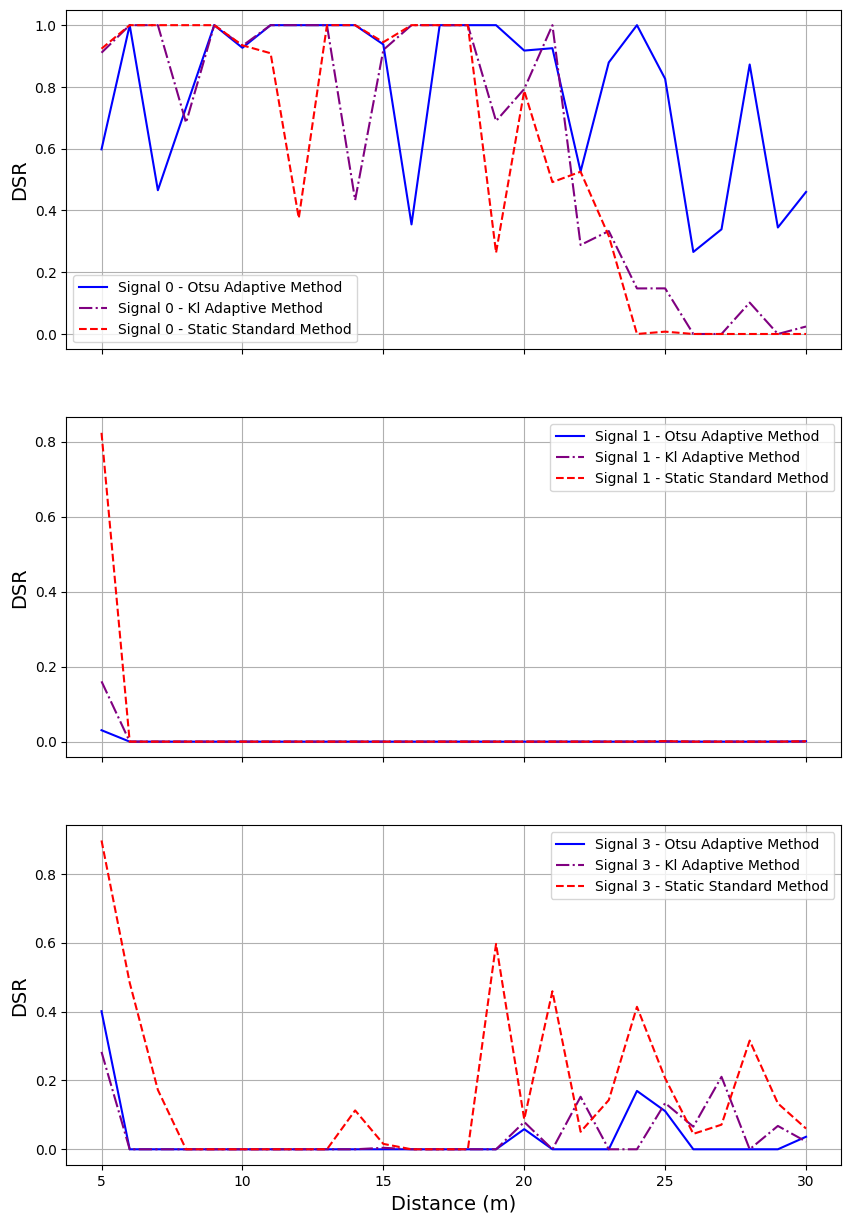

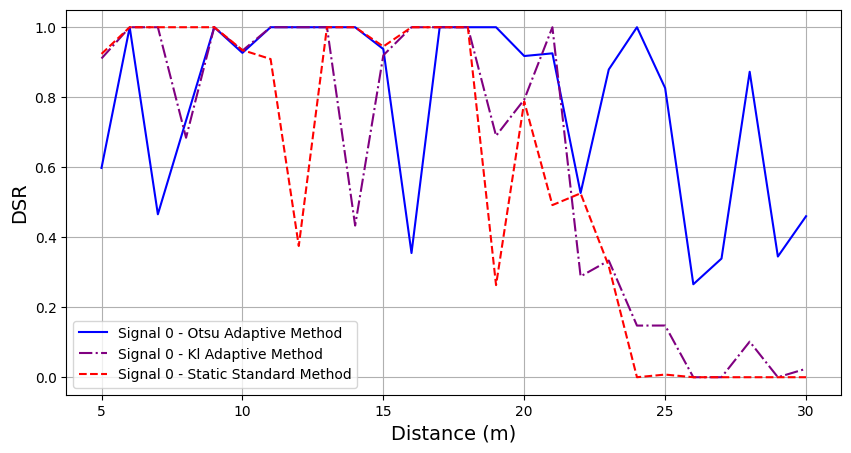

In [182]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
#fig.suptitle(' Comparison of Signal Presence by Distance for Three Methods (Heading)  ', fontsize=16)

signals = ['signal_0','signal_1', 'signal_3']
colors = ['blue', 'green','purple']
labels = ['Signal 0','Signal 1', 'Signal 3']
method_names = ['Otsu Adaptive Method','Kl Adaptive Method', 'Static Standard Method']

# ignal presence for each signal
for i, signal in enumerate(signals):
    x_otsu = np.array(otsu_signal_presence_by_distance['rounded_distance'])
    y_otsu = np.array(otsu_signal_presence_by_distance[signal])
    x_kl = np.array(kl_signal_presence_by_distance['rounded_distance'])
    y_kl = np.array(kl_signal_presence_by_distance[signal])
    x_standard = np.array(standard_signal_presence_by_distance['rounded_distance'])
    y_standard = np.array(standard_signal_presence_by_distance[signal])
    
    axes[i].plot(x_otsu, y_otsu, color='blue', label=f'{labels[i]} - {method_names[0]}')
    axes[i].plot(x_kl, y_kl, '-.', color='purple', label=f'{labels[i]} - {method_names[1]}')
    axes[i].plot(x_standard, y_standard, '--', color='red', label=f'{labels[i]} - {method_names[2]}')
    axes[i].set_ylabel('DSR', fontsize=14)
    axes[i].legend(loc='best')
    axes[i].grid(True)

axes[-1].set_xlabel('Distance (m)' , fontsize=14)

plt.show()

#Plot only the signal 0 presence
plt.figure(figsize=(10, 5))
plt.plot(otsu_signal_presence_by_distance['rounded_distance'], otsu_signal_presence_by_distance['signal_0'], label='Signal 0 - Otsu Adaptive Method', color='blue')
plt.plot(kl_signal_presence_by_distance['rounded_distance'], kl_signal_presence_by_distance['signal_0'], label='Signal 0 - Kl Adaptive Method', color='purple', linestyle='-.')

plt.plot(standard_signal_presence_by_distance['rounded_distance'], standard_signal_presence_by_distance['signal_0'], label='Signal 0 - Static Standard Method', color='red', linestyle='--')
#plt.title('Signal 0 Presence with increasing distance (Heading)')
plt.xlabel('Distance (m)', fontsize=14)
plt.ylabel('DSR', fontsize=14)
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Exposure 

In [143]:
## Real world

# Calculating the overall presence of each signal in both datasets
overall_presence_adaptive = data_adaptive_ex500[['signal_0','signal_1', 'signal_3']].mean()
overall_presence_standard = data_standard_ex500[['signal_0','signal_1', 'signal_3']].mean()
overall_presence_adaptive_kl = data_kl_adaptive_ex500[['signal_0','signal_1', 'signal_3']].mean()

# Comparing the average distance for which each signal is detected
average_distance_adaptive = data_adaptive_ex500.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()
average_distance_standard = data_standard_ex500.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()
average_distance_adaptive_kl = data_kl_adaptive_ex500.groupby(['signal_0','signal_1', 'signal_3'])['relative_distance_y'].mean().reset_index()

#Print as a table the overall presence of each signal in the three datasets
print(overall_presence_adaptive)
print(overall_presence_standard)
print(overall_presence_adaptive_kl)


#overall_presence_adaptive, overall_presence_standard, average_distance_adaptive, average_distance_standard, overall_presence_adaptive_kl, average_distance_adaptive_kl

signal_0    0.480427
signal_1    0.428155
signal_3    0.501919
dtype: float64
signal_0    0.414743
signal_1    0.380285
signal_3    0.555994
dtype: float64
signal_0    0.415961
signal_1    0.351910
signal_3    0.489435
dtype: float64


In [144]:
#grouping by distance and calculating the signal presence rate

data_adaptive_ex500['rounded_distance'] = data_adaptive_ex500['relative_distance_y'].round()

#Otsu number of points per distance
otsu_num_points_500 = data_adaptive_ex500.groupby('rounded_distance')['num_points'].mean().reset_index()

#grouping by distance and calculating the signal presence rate

data_kl_adaptive_ex500['rounded_distance'] = data_kl_adaptive_ex500['relative_distance_y'].round()
#KL number of points per distance
kl_num_points_500 = data_kl_adaptive_ex500.groupby('rounded_distance')['num_points'].mean().reset_index()

#standard

data_standard_ex500['rounded_distance'] = data_standard_ex500['relative_distance_y'].round()
#Standard number of points per distance
standard_num_points_500 = data_standard_ex500.groupby('rounded_distance')['num_points'].mean().reset_index()


In [ ]:
otsu_detected_describe= otsu_num_points['num_points'].describe()
""" kl_num_points['num_points'].describe()
standard_num_points['num_points'].describe() """
kl_detected_describe = kl_num_points['num_points'].describe()
standard_detected_describe = standard_num_points['num_points'].describe()

otsu_detected_describe, kl_detected_describe, standard_detected_describe

(count    26.000000
 mean      2.986372
 std       0.097537
 min       2.746032
 25%       2.944892
 50%       3.000000
 75%       3.012712
 max       3.275862
 Name: num_points, dtype: float64,
 count    26.000000
 mean      3.319066
 std       0.364889
 min       2.806452
 25%       3.000000
 50%       3.277319
 75%       3.587163
 max       3.964912
 Name: num_points, dtype: float64,
 count    26.000000
 mean      2.174995
 std       0.876032
 min       1.000000
 25%       1.121563
 50%       2.525306
 75%       3.000000
 max       3.120690
 Name: num_points, dtype: float64)

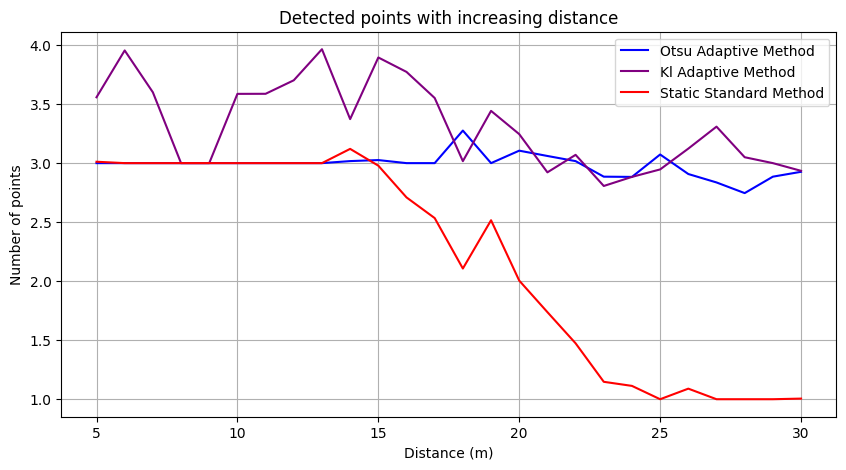

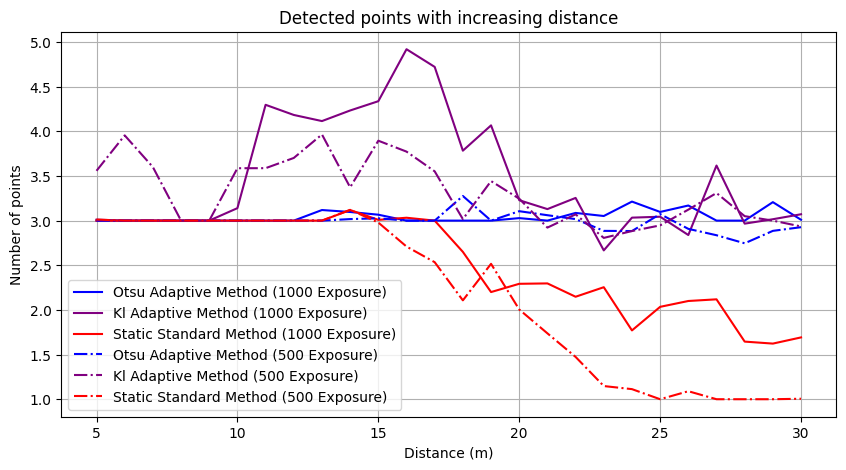

In [145]:
import matplotlib.pyplot as plt
import numpy as np

#Plot for the number of points per distance
plt.figure(figsize=(10, 5))
plt.plot(otsu_num_points_500['rounded_distance'], otsu_num_points_500['num_points'], label='Otsu Adaptive Method', color='blue')
plt.plot(kl_num_points_500['rounded_distance'], kl_num_points_500['num_points'], label='Kl Adaptive Method', color='purple')
plt.plot(standard_num_points_500['rounded_distance'], standard_num_points_500['num_points'], label='Static Standard Method', color='red')
plt.title('Detected points with increasing distance')
plt.xlabel('Distance (m)')
plt.ylabel('Number of points')
plt.legend(loc='best')
plt.grid(True)
plt.show()

#Now print with comparin with 1000 exposure

#Plot for the number of points per distance
plt.figure(figsize=(10, 5))
plt.plot(otsu_num_points_1000['rounded_distance'], otsu_num_points_1000['num_points'], label='Otsu Adaptive Method (1000 Exposure)', color='blue')
plt.plot(kl_num_points_1000['rounded_distance'], kl_num_points_1000['num_points'], label='Kl Adaptive Method (1000 Exposure)', color='purple')
plt.plot(standard_num_points_1000['rounded_distance'], standard_num_points_1000['num_points'], label='Static Standard Method (1000 Exposure)', color='red')
plt.plot(otsu_num_points_500['rounded_distance'], otsu_num_points_500['num_points'], label='Otsu Adaptive Method (500 Exposure)', color='blue', linestyle='-.')
plt.plot(kl_num_points_500['rounded_distance'], kl_num_points_500['num_points'], label='Kl Adaptive Method (500 Exposure)', color='purple', linestyle='-.')
plt.plot(standard_num_points_500['rounded_distance'], standard_num_points_500['num_points'], label='Static Standard Method (500 Exposure)', color='red', linestyle='-.')
plt.title('Detected points with increasing distance')
plt.xlabel('Distance (m)')
plt.ylabel('Number of points')
plt.legend(loc='best')
plt.grid(True)
plt.show()


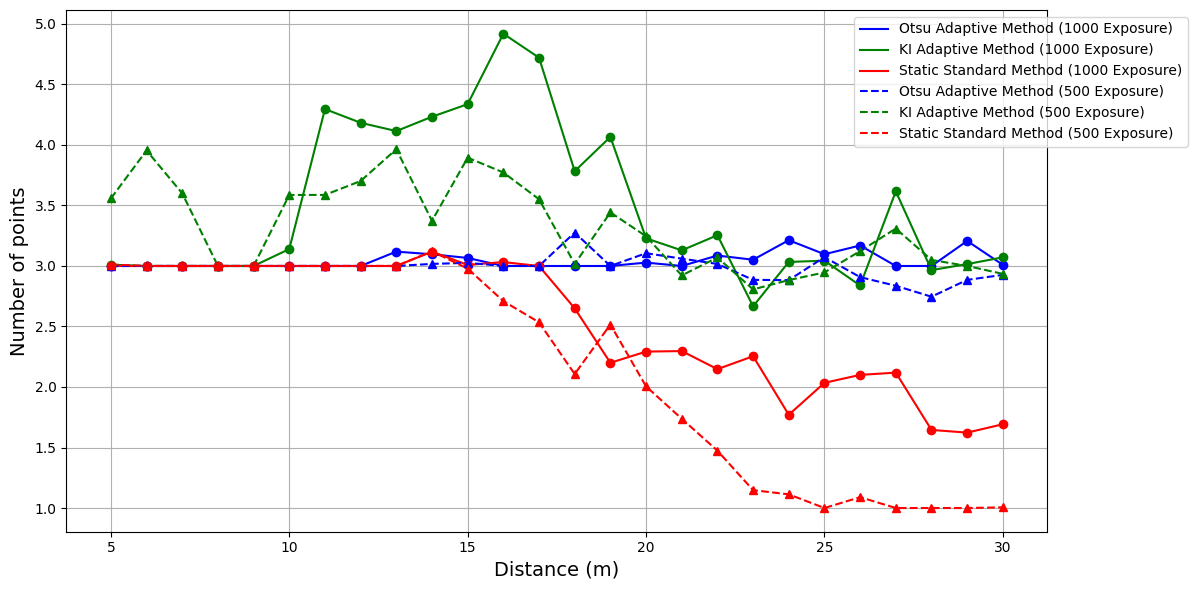

In [163]:
import matplotlib.pyplot as plt

# Plot for the number of points per distance
plt.figure(figsize=(12, 6))

# Plotting each method with different colors and line styles
plt.plot(otsu_num_points_1000['rounded_distance'], otsu_num_points_1000['num_points'], 
         label='Otsu Adaptive Method (1000 Exposure)', color='blue', linestyle='-')
plt.plot(kl_num_points_1000['rounded_distance'], kl_num_points_1000['num_points'], 
         label='KI Adaptive Method (1000 Exposure)', color='green', linestyle='-')
plt.plot(standard_num_points_1000['rounded_distance'], standard_num_points_1000['num_points'], 
         label='Static Standard Method (1000 Exposure)', color='red', linestyle='-')

plt.plot(otsu_num_points_500['rounded_distance'], otsu_num_points_500['num_points'], 
         label='Otsu Adaptive Method (500 Exposure)', color='blue', linestyle='--')
plt.plot(kl_num_points_500['rounded_distance'], kl_num_points_500['num_points'], 
         label='KI Adaptive Method (500 Exposure)', color='green', linestyle='--')
plt.plot(standard_num_points_500['rounded_distance'], standard_num_points_500['num_points'], 
         label='Static Standard Method (500 Exposure)', color='red', linestyle='--')

# Title and labels
#plt.title('Detected points with increasing distance')
plt.xlabel('Distance (m)', fontsize=14)
plt.ylabel('Number of points', fontsize=14)

# Adding markers to improve readability
plt.plot(otsu_num_points_1000['rounded_distance'], otsu_num_points_1000['num_points'], 'bo')
plt.plot(kl_num_points_1000['rounded_distance'], kl_num_points_1000['num_points'], 'go')
plt.plot(standard_num_points_1000['rounded_distance'], standard_num_points_1000['num_points'], 'ro')
plt.plot(otsu_num_points_500['rounded_distance'], otsu_num_points_500['num_points'], 'b^')
plt.plot(kl_num_points_500['rounded_distance'], kl_num_points_500['num_points'], 'g^')
plt.plot(standard_num_points_500['rounded_distance'], standard_num_points_500['num_points'], 'r^')

# Legend
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


In [148]:
#grouping by distance and calculating the signal presence rate

data_adaptive_ex500['rounded_distance'] = data_adaptive_ex500['relative_distance_y'].round()

otsu_signal_presence_by_distance_500 = data_adaptive_ex500.groupby('rounded_distance')[['signal_0','signal_1', 'signal_3']].mean().reset_index()

#grouping by distance and calculating the signal presence rate

data_kl_adaptive_ex500['rounded_distance'] = data_kl_adaptive_ex500['relative_distance_y'].round()

kl_signal_presence_by_distance_500 = data_kl_adaptive_ex500.groupby('rounded_distance')[['signal_0','signal_1', 'signal_3']].mean().reset_index()

data_standard_ex500['rounded_distance'] = data_standard_ex500['relative_distance_y'].round()

standard_signal_presence_by_distance_500 = data_standard_ex500.groupby('rounded_distance')[['signal_0','signal_1', 'signal_3']].mean().reset_index()

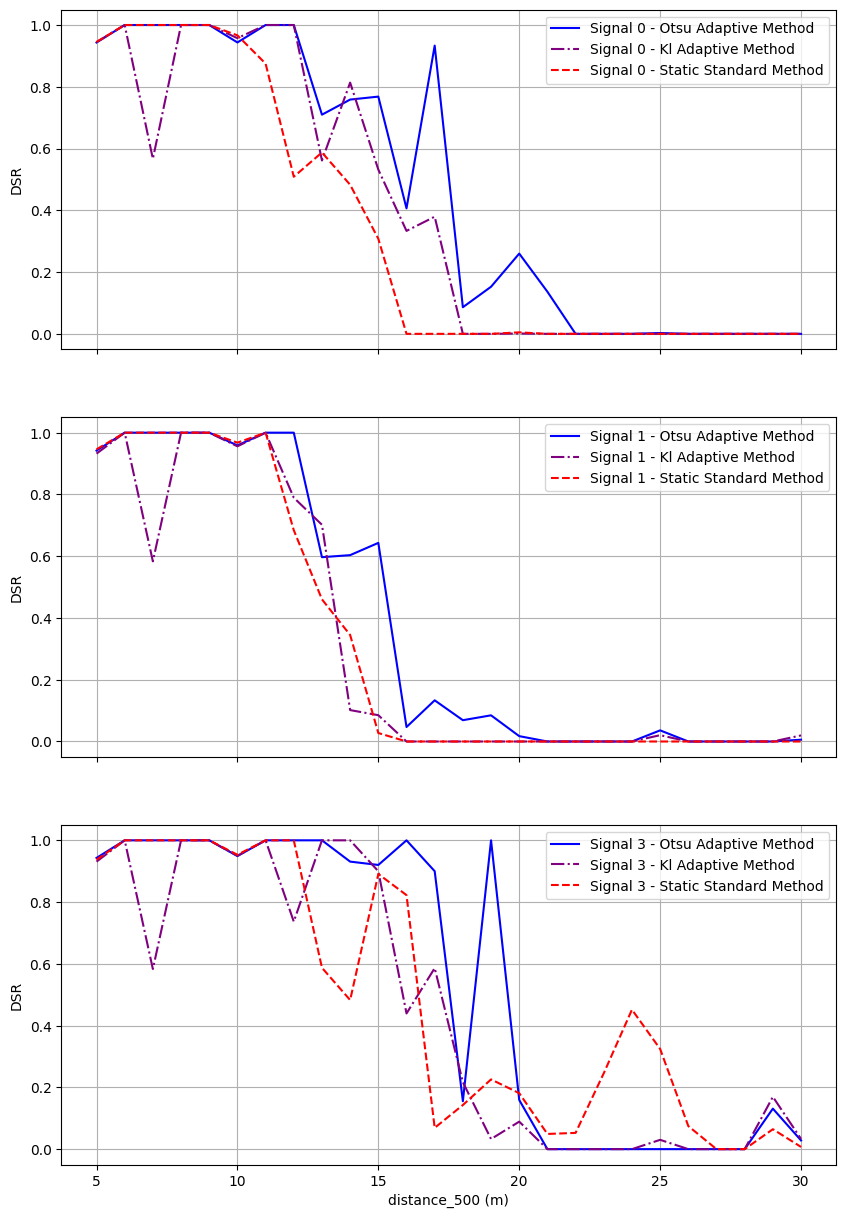

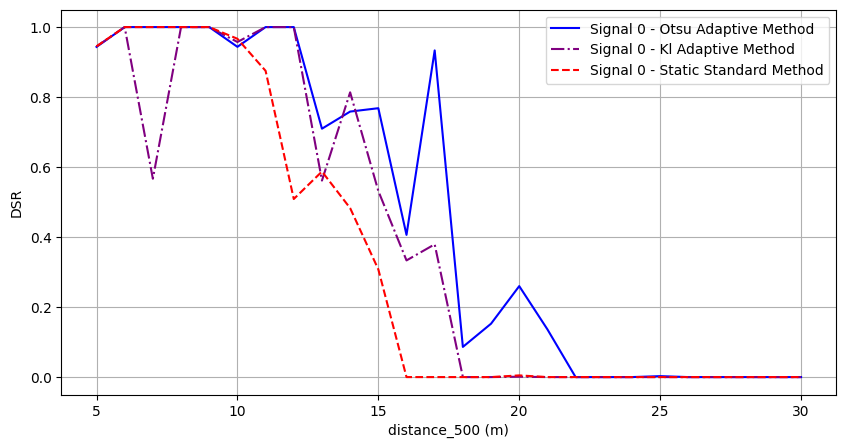

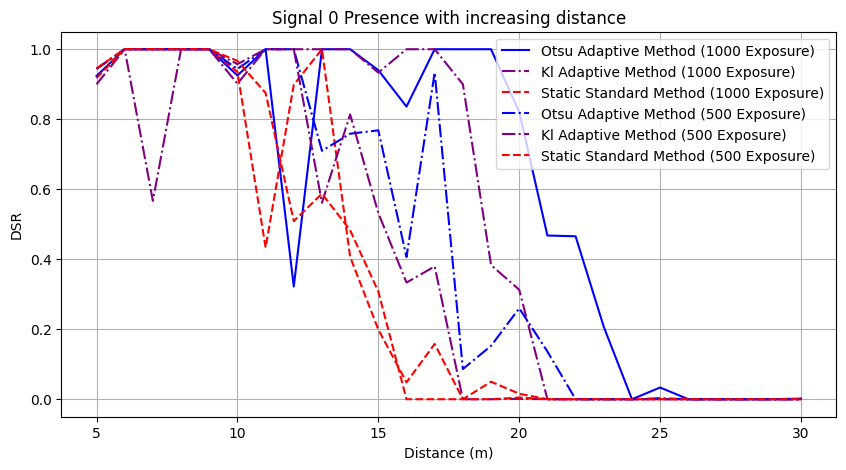

In [149]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
#fig.suptitle(' Comparison of Signal Presence by distance_500 for Three Methods (Exposure 500) ', fontsize=16)

signals = ['signal_0','signal_1', 'signal_3']
colors = ['blue', 'green','purple']
labels = ['Signal 0','Signal 1', 'Signal 3']
method_names = ['Otsu Adaptive Method','Kl Adaptive Method', 'Static Standard Method']

# ignal presence for each signal
for i, signal in enumerate(signals):
    x_otsu = np.array(otsu_signal_presence_by_distance_500['rounded_distance'])
    y_otsu = np.array(otsu_signal_presence_by_distance_500[signal])
    x_kl = np.array(kl_signal_presence_by_distance_500['rounded_distance'])
    y_kl = np.array(kl_signal_presence_by_distance_500[signal])
    x_standard = np.array(standard_signal_presence_by_distance_500['rounded_distance'])
    y_standard = np.array(standard_signal_presence_by_distance_500[signal])
    
    axes[i].plot(x_otsu, y_otsu, color='blue', label=f'{labels[i]} - {method_names[0]}')
    axes[i].plot(x_kl, y_kl, '-.', color='purple', label=f'{labels[i]} - {method_names[1]}')
    axes[i].plot(x_standard, y_standard, '--', color='red', label=f'{labels[i]} - {method_names[2]}')
    axes[i].set_ylabel('DSR')
    axes[i].legend(loc='best')
    axes[i].grid(True)

axes[-1].set_xlabel('distance_500 (m)')

plt.show()

#Plot only the signal 0 presence
plt.figure(figsize=(10, 5))
plt.plot(otsu_signal_presence_by_distance_500['rounded_distance'], otsu_signal_presence_by_distance_500['signal_0'], label='Signal 0 - Otsu Adaptive Method', color='blue')
plt.plot(kl_signal_presence_by_distance_500['rounded_distance'], kl_signal_presence_by_distance_500['signal_0'], label='Signal 0 - Kl Adaptive Method', color='purple', linestyle='-.')
plt.plot(standard_signal_presence_by_distance_500['rounded_distance'], standard_signal_presence_by_distance_500['signal_0'], label='Signal 0 - Static Standard Method', color='red', linestyle='--')
#plt.title('Signal 0 Presence with increasing distance_500')
plt.xlabel('distance_500 (m)')
plt.ylabel('DSR')
plt.legend(loc='best')
plt.grid(True)
plt.show()

#Now print with comparin with 1000 exposure

#Plot for the number of points per distance
plt.figure(figsize=(10, 5))
plt.plot(otsu_signal_presence_by_distance_1000['rounded_distance'], otsu_signal_presence_by_distance_1000['signal_0'], label='Otsu Adaptive Method (1000 Exposure)', color='blue')
plt.plot(kl_signal_presence_by_distance_1000['rounded_distance'], kl_signal_presence_by_distance_1000['signal_0'], label='Kl Adaptive Method (1000 Exposure)', color='purple', linestyle='-.')
plt.plot(standard_signal_presence_by_distance_1000['rounded_distance'], standard_signal_presence_by_distance_1000['signal_0'], label='Static Standard Method (1000 Exposure)', color='red', linestyle='--')
plt.plot(otsu_signal_presence_by_distance_500['rounded_distance'], otsu_signal_presence_by_distance_500['signal_0'], label='Otsu Adaptive Method (500 Exposure)', color='blue', linestyle='-.')
plt.plot(kl_signal_presence_by_distance_500['rounded_distance'], kl_signal_presence_by_distance_500['signal_0'], label='Kl Adaptive Method (500 Exposure)', color='purple', linestyle='-.')
plt.plot(standard_signal_presence_by_distance_500['rounded_distance'], standard_signal_presence_by_distance_500['signal_0'], label='Static Standard Method (500 Exposure)', color='red', linestyle='--')
plt.title('Signal 0 Presence with increasing distance')
plt.xlabel('Distance (m)')
plt.ylabel('DSR')
plt.legend(loc='best')
plt.grid(True)
plt.show()






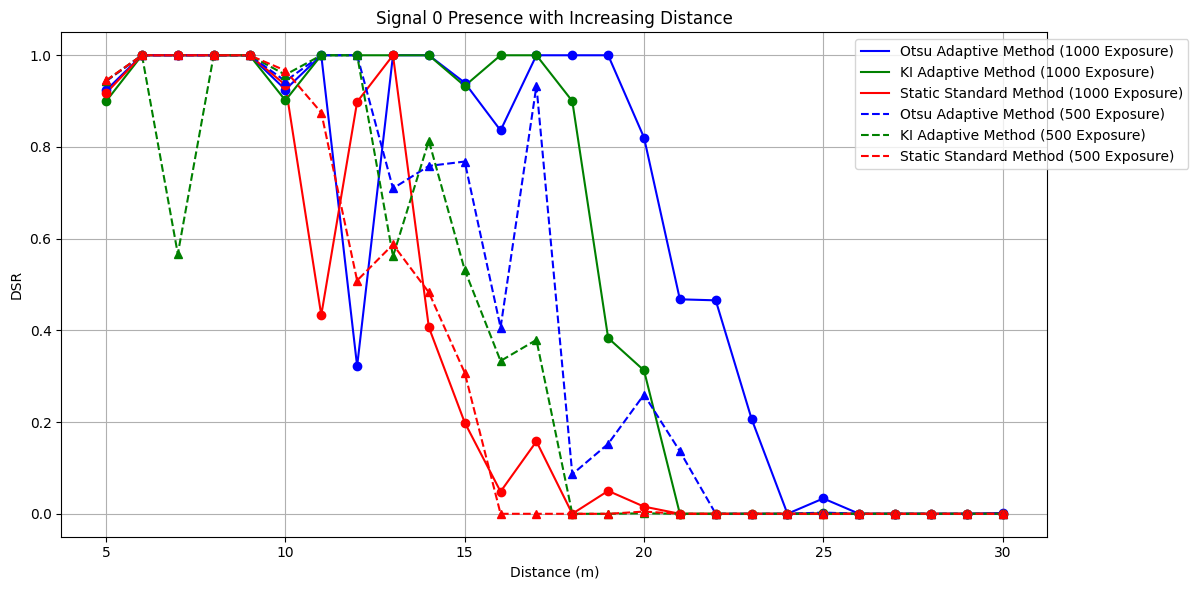

In [150]:
import matplotlib.pyplot as plt

# Plot for the number of points per distance
plt.figure(figsize=(12, 6))

# Plotting each method with different colors and line styles
plt.plot(otsu_signal_presence_by_distance_1000['rounded_distance'], otsu_signal_presence_by_distance_1000['signal_0'], 
         label='Otsu Adaptive Method (1000 Exposure)', color='blue', linestyle='-')
plt.plot(kl_signal_presence_by_distance_1000['rounded_distance'], kl_signal_presence_by_distance_1000['signal_0'], 
         label='KI Adaptive Method (1000 Exposure)', color='green', linestyle='-')
plt.plot(standard_signal_presence_by_distance_1000['rounded_distance'], standard_signal_presence_by_distance_1000['signal_0'], 
         label='Static Standard Method (1000 Exposure)', color='red', linestyle='-')

plt.plot(otsu_signal_presence_by_distance_500['rounded_distance'], otsu_signal_presence_by_distance_500['signal_0'], 
         label='Otsu Adaptive Method (500 Exposure)', color='blue', linestyle='--')
plt.plot(kl_signal_presence_by_distance_500['rounded_distance'], kl_signal_presence_by_distance_500['signal_0'], 
         label='KI Adaptive Method (500 Exposure)', color='green', linestyle='--')
plt.plot(standard_signal_presence_by_distance_500['rounded_distance'], standard_signal_presence_by_distance_500['signal_0'], 
         label='Static Standard Method (500 Exposure)', color='red', linestyle='--')

# Title and labels
plt.title('Signal 0 Presence with Increasing Distance')
plt.xlabel('Distance (m)')
plt.ylabel('DSR')

# Adding markers to improve readability
plt.plot(otsu_signal_presence_by_distance_1000['rounded_distance'], otsu_signal_presence_by_distance_1000['signal_0'], 'bo')
plt.plot(kl_signal_presence_by_distance_1000['rounded_distance'], kl_signal_presence_by_distance_1000['signal_0'], 'go')
plt.plot(standard_signal_presence_by_distance_1000['rounded_distance'], standard_signal_presence_by_distance_1000['signal_0'], 'ro')
plt.plot(otsu_signal_presence_by_distance_500['rounded_distance'], otsu_signal_presence_by_distance_500['signal_0'], 'b^')
plt.plot(kl_signal_presence_by_distance_500['rounded_distance'], kl_signal_presence_by_distance_500['signal_0'], 'g^')
plt.plot(standard_signal_presence_by_distance_500['rounded_distance'], standard_signal_presence_by_distance_500['signal_0'], 'r^')

# Legend
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

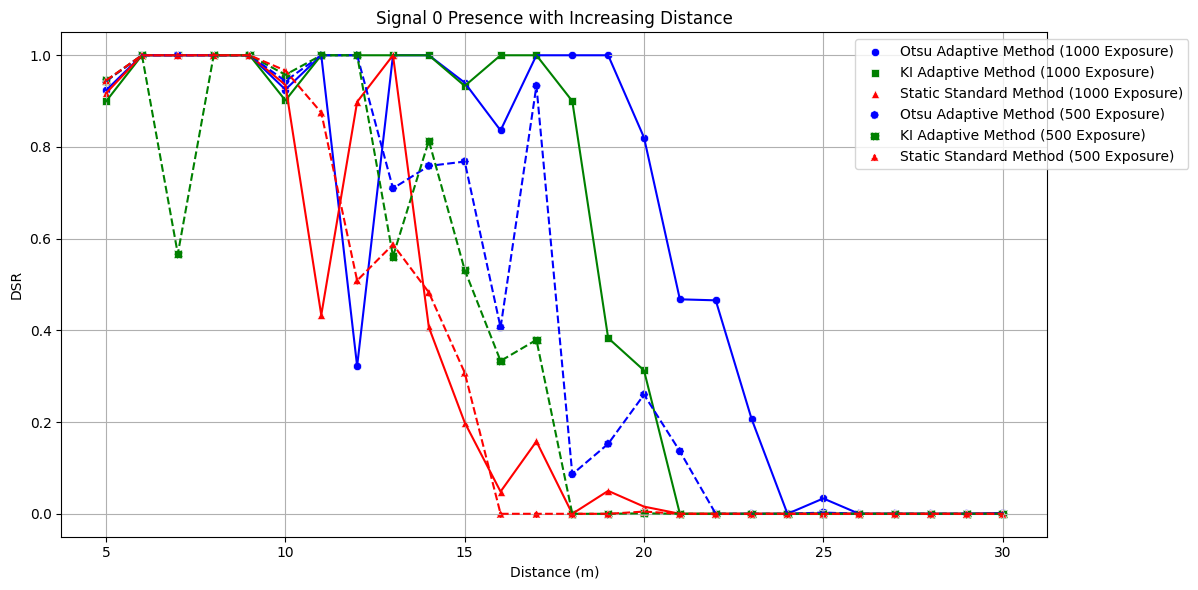

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot with Trend Lines for the number of points per distance
plt.figure(figsize=(12, 6))

# Plotting each method with different colors and markers
sns.scatterplot(x='rounded_distance', y='signal_0', data=otsu_signal_presence_by_distance_1000, label='Otsu Adaptive Method (1000 Exposure)', color='blue', marker='o')
sns.scatterplot(x='rounded_distance', y='signal_0', data=kl_signal_presence_by_distance_1000, label='KI Adaptive Method (1000 Exposure)', color='green', marker='s')
sns.scatterplot(x='rounded_distance', y='signal_0', data=standard_signal_presence_by_distance_1000, label='Static Standard Method (1000 Exposure)', color='red', marker='^')

sns.scatterplot(x='rounded_distance', y='signal_0', data=otsu_signal_presence_by_distance_500, label='Otsu Adaptive Method (500 Exposure)', color='blue', marker='o', edgecolor='w', linestyle='--')
sns.scatterplot(x='rounded_distance', y='signal_0', data=kl_signal_presence_by_distance_500, label='KI Adaptive Method (500 Exposure)', color='green', marker='s', edgecolor='w', linestyle='--')
sns.scatterplot(x='rounded_distance', y='signal_0', data=standard_signal_presence_by_distance_500, label='Static Standard Method (500 Exposure)', color='red', marker='^', edgecolor='w', linestyle='--')

# Adding trend lines
sns.lineplot(x='rounded_distance', y='signal_0', data=otsu_signal_presence_by_distance_1000, color='blue', linestyle='-')
sns.lineplot(x='rounded_distance', y='signal_0', data=kl_signal_presence_by_distance_1000, color='green', linestyle='-')
sns.lineplot(x='rounded_distance', y='signal_0', data=standard_signal_presence_by_distance_1000, color='red', linestyle='-')

sns.lineplot(x='rounded_distance', y='signal_0', data=otsu_signal_presence_by_distance_500, color='blue', linestyle='--')
sns.lineplot(x='rounded_distance', y='signal_0', data=kl_signal_presence_by_distance_500, color='green', linestyle='--')
sns.lineplot(x='rounded_distance', y='signal_0', data=standard_signal_presence_by_distance_500, color='red', linestyle='--')

# Title and labels
plt.title('Signal 0 Presence with Increasing Distance')
plt.xlabel('Distance (m)')
plt.ylabel('DSR')

# Legend
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

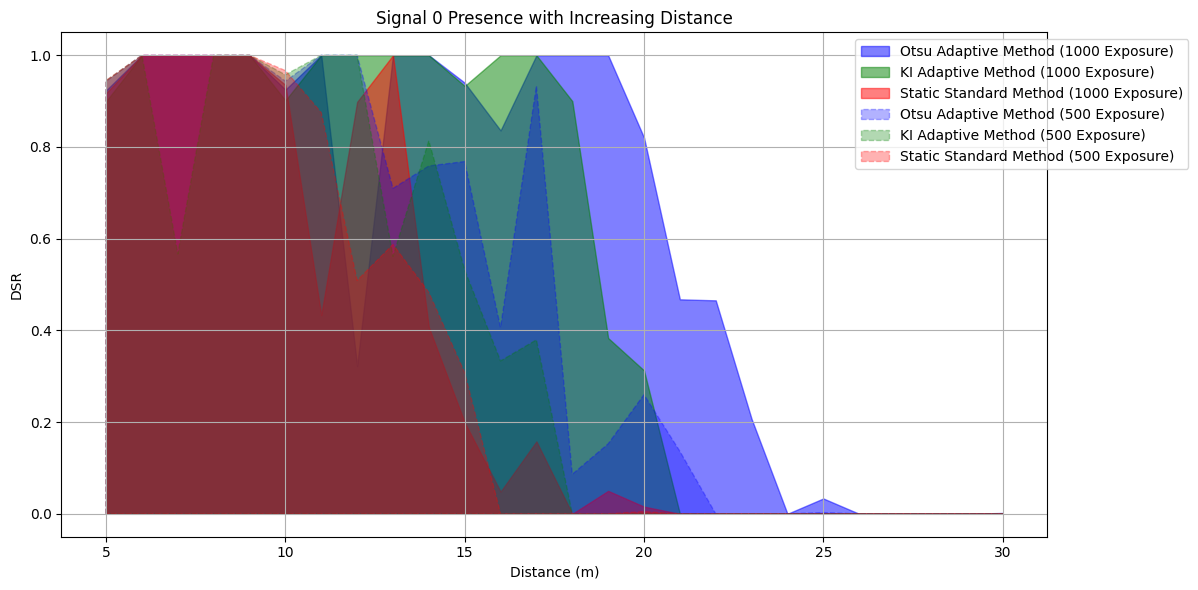

In [152]:
import matplotlib.pyplot as plt

# Ensure data is sorted by distance for proper area stacking
otsu_signal_presence_by_distance_1000 = otsu_signal_presence_by_distance_1000.sort_values(by='rounded_distance')
kl_signal_presence_by_distance_1000 = kl_signal_presence_by_distance_1000.sort_values(by='rounded_distance')
standard_signal_presence_by_distance_1000 = standard_signal_presence_by_distance_1000.sort_values(by='rounded_distance')
otsu_signal_presence_by_distance_500 = otsu_signal_presence_by_distance_500.sort_values(by='rounded_distance')
kl_signal_presence_by_distance_500 = kl_signal_presence_by_distance_500.sort_values(by='rounded_distance')
standard_signal_presence_by_distance_500 = standard_signal_presence_by_distance_500.sort_values(by='rounded_distance')

# Creating the stacked area chart
plt.figure(figsize=(12, 6))

# Stacked areas for 1000 Exposure
plt.fill_between(otsu_signal_presence_by_distance_1000['rounded_distance'], 
                 otsu_signal_presence_by_distance_1000['signal_0'], 
                 label='Otsu Adaptive Method (1000 Exposure)', color='blue', alpha=0.5)

plt.fill_between(kl_signal_presence_by_distance_1000['rounded_distance'], 
                 kl_signal_presence_by_distance_1000['signal_0'], 
                 label='KI Adaptive Method (1000 Exposure)', color='green', alpha=0.5)

plt.fill_between(standard_signal_presence_by_distance_1000['rounded_distance'], 
                 standard_signal_presence_by_distance_1000['signal_0'], 
                 label='Static Standard Method (1000 Exposure)', color='red', alpha=0.5)

# Stacked areas for 500 Exposure
plt.fill_between(otsu_signal_presence_by_distance_500['rounded_distance'], 
                 otsu_signal_presence_by_distance_500['signal_0'], 
                 label='Otsu Adaptive Method (500 Exposure)', color='blue', alpha=0.3, linestyle='--')

plt.fill_between(kl_signal_presence_by_distance_500['rounded_distance'], 
                 kl_signal_presence_by_distance_500['signal_0'], 
                 label='KI Adaptive Method (500 Exposure)', color='green', alpha=0.3, linestyle='--')

plt.fill_between(standard_signal_presence_by_distance_500['rounded_distance'], 
                 standard_signal_presence_by_distance_500['signal_0'], 
                 label='Static Standard Method (500 Exposure)', color='red', alpha=0.3, linestyle='--')

# Title and labels
plt.title('Signal 0 Presence with Increasing Distance')
plt.xlabel('Distance (m)')
plt.ylabel('DSR')

# Legend
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

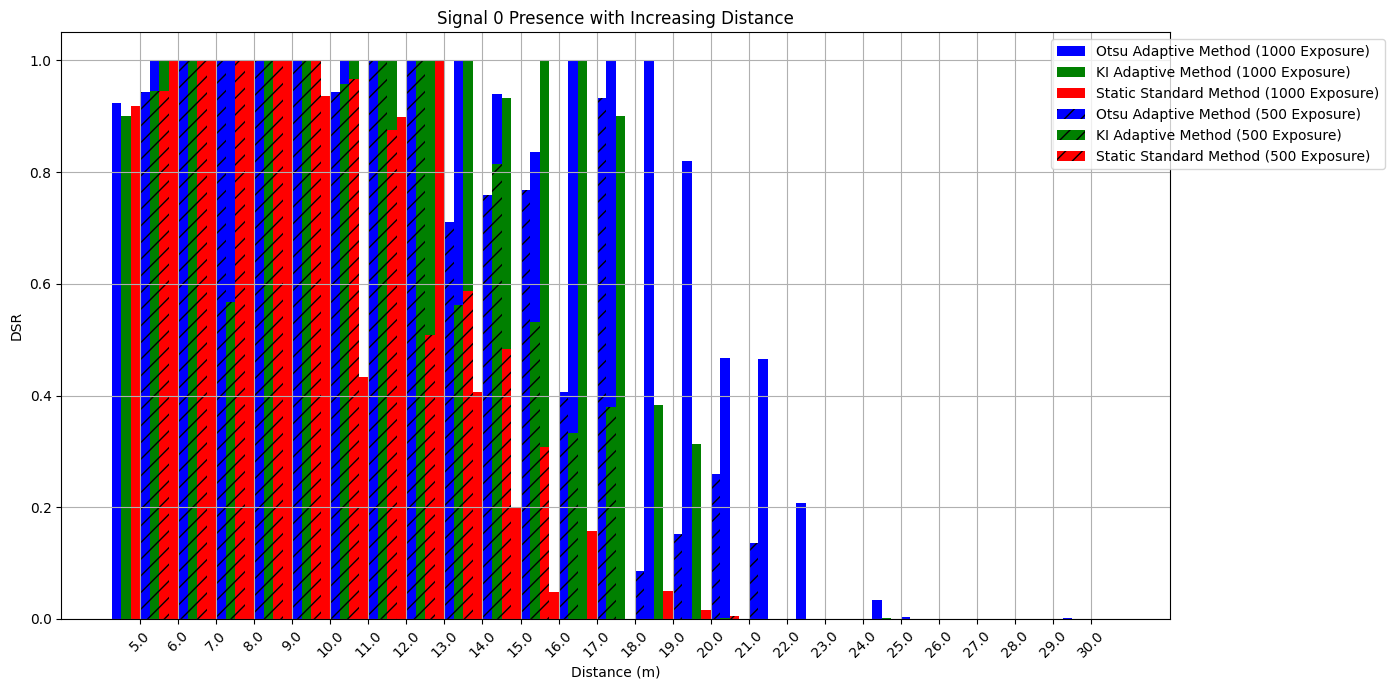

In [153]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for plotting (assuming dataframes are loaded with these columns)
# Adjust the following sample data as per your actual dataframe columns
distances = otsu_signal_presence_by_distance_1000['rounded_distance']
otsu_1000 = otsu_signal_presence_by_distance_1000['signal_0']
kl_1000 = kl_signal_presence_by_distance_1000['signal_0']
standard_1000 = standard_signal_presence_by_distance_1000['signal_0']
otsu_500 = otsu_signal_presence_by_distance_500['signal_0']
kl_500 = kl_signal_presence_by_distance_500['signal_0']
standard_500 = standard_signal_presence_by_distance_500['signal_0']

# Creating the bar width and positions
bar_width = 0.25
index = np.arange(len(distances))

# Plotting the bars
plt.figure(figsize=(14, 7))

plt.bar(index - bar_width * 2.5, otsu_1000, bar_width, label='Otsu Adaptive Method (1000 Exposure)', color='blue')
plt.bar(index - bar_width * 1.5, kl_1000, bar_width, label='KI Adaptive Method (1000 Exposure)', color='green')
plt.bar(index - bar_width * 0.5, standard_1000, bar_width, label='Static Standard Method (1000 Exposure)', color='red')

plt.bar(index + bar_width * 0.5, otsu_500, bar_width, label='Otsu Adaptive Method (500 Exposure)', color='blue', hatch='//')
plt.bar(index + bar_width * 1.5, kl_500, bar_width, label='KI Adaptive Method (500 Exposure)', color='green', hatch='//')
plt.bar(index + bar_width * 2.5, standard_500, bar_width, label='Static Standard Method (500 Exposure)', color='red', hatch='//')

# Title and labels
plt.title('Signal 0 Presence with Increasing Distance')
plt.xlabel('Distance (m)')
plt.ylabel('DSR')

# Setting the positions of the x-ticks and their labels
plt.xticks(index, distances, rotation=45)

# Legend
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

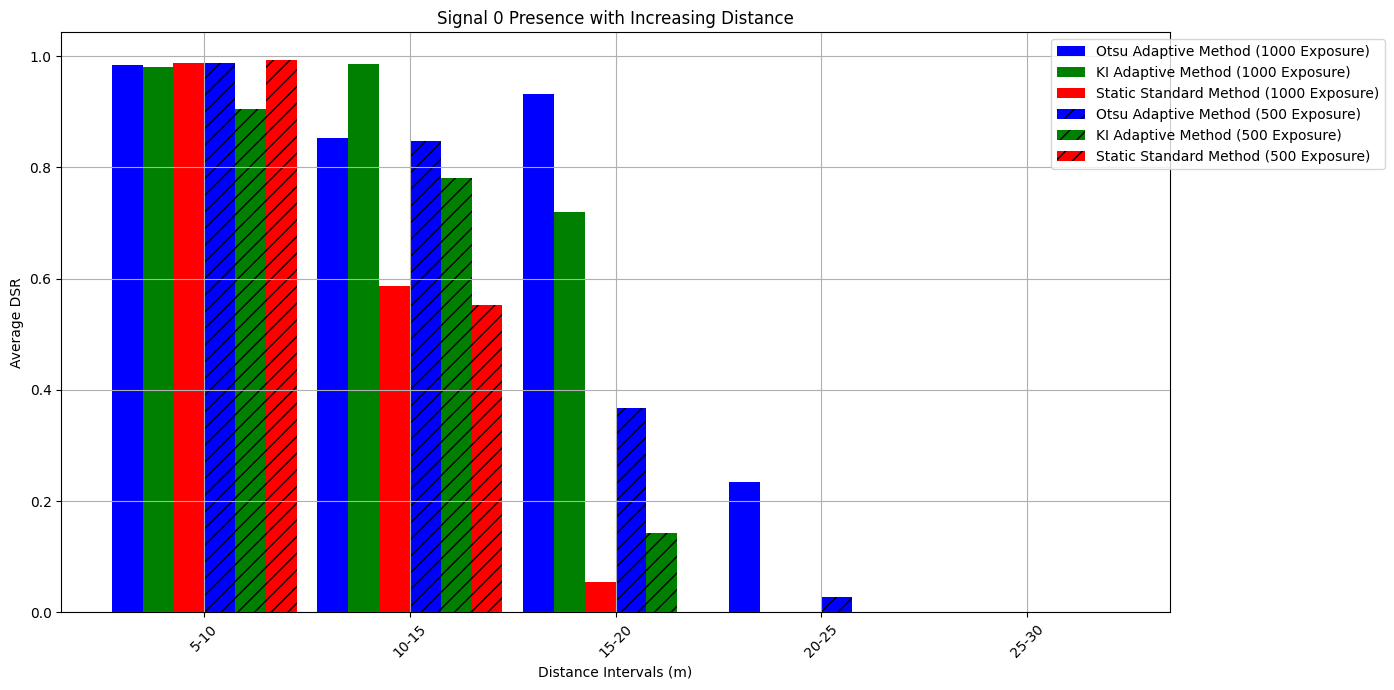

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate data into specified intervals
intervals = [5, 10, 15, 20, 25, 30]

def aggregate_data(df, intervals):
    aggregated_data = []
    for i in range(len(intervals) - 1):
        mask = (df['rounded_distance'] > intervals[i]) & (df['rounded_distance'] <= intervals[i + 1])
        aggregated_data.append(df[mask]['signal_0'].mean())
    return aggregated_data

# Aggregated data for each method and exposure
otsu_1000_agg = aggregate_data(otsu_signal_presence_by_distance_1000, intervals)
kl_1000_agg = aggregate_data(kl_signal_presence_by_distance_1000, intervals)
standard_1000_agg = aggregate_data(standard_signal_presence_by_distance_1000, intervals)
otsu_500_agg = aggregate_data(otsu_signal_presence_by_distance_500, intervals)
kl_500_agg = aggregate_data(kl_signal_presence_by_distance_500, intervals)
standard_500_agg = aggregate_data(standard_signal_presence_by_distance_500, intervals)

# Bar plot for aggregated data
bar_width = 0.15
index = np.arange(len(intervals) - 1)

plt.figure(figsize=(14, 7))

plt.bar(index - bar_width * 2.5, otsu_1000_agg, bar_width, label='Otsu Adaptive Method (1000 Exposure)', color='blue')
plt.bar(index - bar_width * 1.5, kl_1000_agg, bar_width, label='KI Adaptive Method (1000 Exposure)', color='green')
plt.bar(index - bar_width * 0.5, standard_1000_agg, bar_width, label='Static Standard Method (1000 Exposure)', color='red')

plt.bar(index + bar_width * 0.5, otsu_500_agg, bar_width, label='Otsu Adaptive Method (500 Exposure)', color='blue', hatch='//')
plt.bar(index + bar_width * 1.5, kl_500_agg, bar_width, label='KI Adaptive Method (500 Exposure)', color='green', hatch='//')
plt.bar(index + bar_width * 2.5, standard_500_agg, bar_width, label='Static Standard Method (500 Exposure)', color='red', hatch='//')

# Title and labels
plt.title('Signal 0 Presence with Increasing Distance')
plt.xlabel('Distance Intervals (m)')
plt.ylabel('Average DSR')

# Setting the positions of the x-ticks and their labels
plt.xticks(index, [f'{intervals[i]}-{intervals[i+1]}' for i in range(len(intervals) - 1)], rotation=45)

# Legend
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

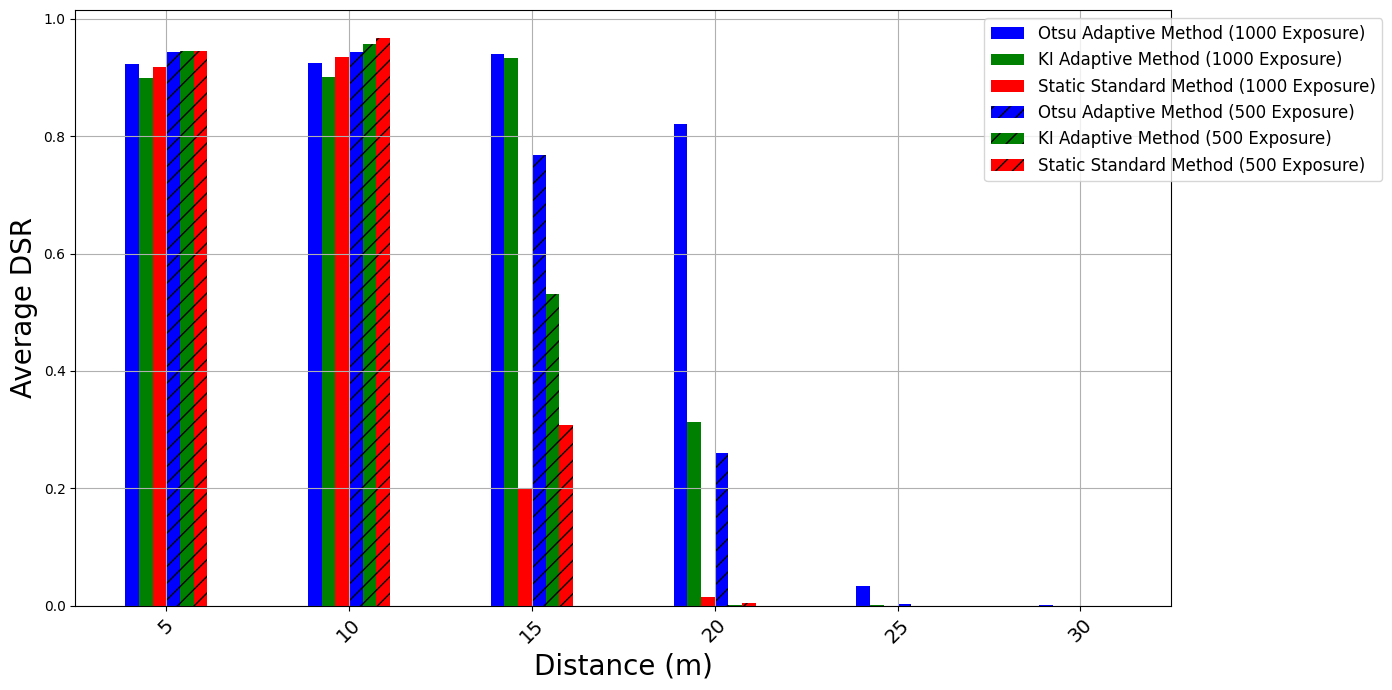

In [180]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Aggregation function for exact distance points
def aggregate_exact_distances(df, distances):
    aggregated_data = []
    for distance in distances:
        mask = df['rounded_distance'] == distance
        aggregated_data.append(df[mask]['signal_0'].mean())
    return aggregated_data

# Specified distances
distances = [5, 10, 15, 20, 25, 30]

# Aggregated data for each method and exposure
otsu_1000_agg = aggregate_exact_distances(otsu_signal_presence_by_distance_1000, distances)
kl_1000_agg = aggregate_exact_distances(kl_signal_presence_by_distance_1000, distances)
standard_1000_agg = aggregate_exact_distances(standard_signal_presence_by_distance_1000, distances)
otsu_500_agg = aggregate_exact_distances(otsu_signal_presence_by_distance_500, distances)
kl_500_agg = aggregate_exact_distances(kl_signal_presence_by_distance_500, distances)
standard_500_agg = aggregate_exact_distances(standard_signal_presence_by_distance_500, distances)

# Bar plot for aggregated data
bar_width = 0.15
index = np.arange(len(distances)* 2, step=2)

plt.figure(figsize=(14, 7))

plt.bar(index - bar_width * 2.5, otsu_1000_agg, bar_width, label='Otsu Adaptive Method (1000 Exposure)', color='blue')
plt.bar(index - bar_width * 1.5, kl_1000_agg, bar_width, label='KI Adaptive Method (1000 Exposure)', color='green')
plt.bar(index - bar_width * 0.5, standard_1000_agg, bar_width, label='Static Standard Method (1000 Exposure)', color='red')

plt.bar(index + bar_width * 0.5, otsu_500_agg, bar_width, label='Otsu Adaptive Method (500 Exposure)', color='blue', hatch='//')
plt.bar(index + bar_width * 1.5, kl_500_agg, bar_width, label='KI Adaptive Method (500 Exposure)', color='green', hatch='//')
plt.bar(index + bar_width * 2.5, standard_500_agg, bar_width, label='Static Standard Method (500 Exposure)', color='red', hatch='//')

# Title and labels
#plt.title('Decoding Success Rate with Increasing Distance')
plt.xlabel('Distance (m)', fontsize=20)
plt.ylabel('Average DSR', fontsize=20)

# Setting the positions of the x-ticks and their labels
plt.xticks(index, distances, rotation=45, fontsize=14)

# Legend
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=12)

# Grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

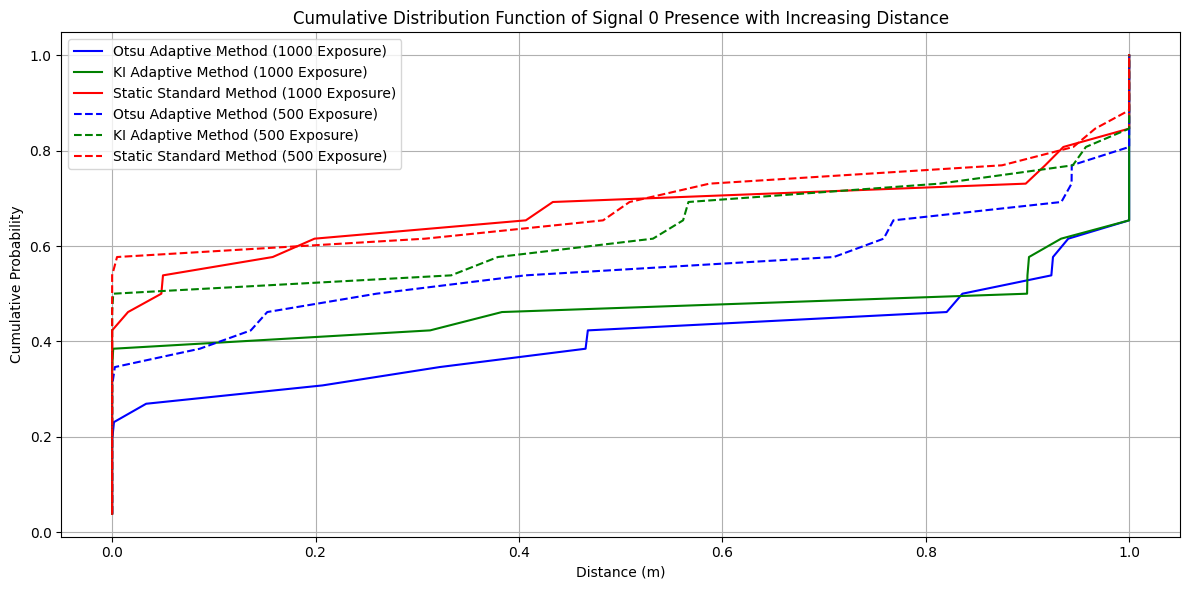

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to compute CDF
def compute_cdf(data):
    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data)+1) / float(len(sorted_data))
    return sorted_data, yvals

# Sample data for plotting (assuming dataframes are loaded with these columns)
# Adjust the following sample data as per your actual dataframe columns
distances_1000 = otsu_signal_presence_by_distance_1000['rounded_distance']
otsu_1000 = otsu_signal_presence_by_distance_1000['signal_0']
kl_1000 = kl_signal_presence_by_distance_1000['signal_0']
standard_1000 = standard_signal_presence_by_distance_1000['signal_0']

distances_500 = otsu_signal_presence_by_distance_500['rounded_distance']
otsu_500 = otsu_signal_presence_by_distance_500['signal_0']
kl_500 = kl_signal_presence_by_distance_500['signal_0']
standard_500 = standard_signal_presence_by_distance_500['signal_0']

# Plotting the CDF
plt.figure(figsize=(12, 6))

# 1000 Exposure CDF
sorted_dist_otsu_1000, cdf_otsu_1000 = compute_cdf(otsu_1000)
plt.plot(sorted_dist_otsu_1000, cdf_otsu_1000, label='Otsu Adaptive Method (1000 Exposure)', color='blue')

sorted_dist_kl_1000, cdf_kl_1000 = compute_cdf(kl_1000)
plt.plot(sorted_dist_kl_1000, cdf_kl_1000, label='KI Adaptive Method (1000 Exposure)', color='green')

sorted_dist_standard_1000, cdf_standard_1000 = compute_cdf(standard_1000)
plt.plot(sorted_dist_standard_1000, cdf_standard_1000, label='Static Standard Method (1000 Exposure)', color='red')

# 500 Exposure CDF
sorted_dist_otsu_500, cdf_otsu_500 = compute_cdf(otsu_500)
plt.plot(sorted_dist_otsu_500, cdf_otsu_500, label='Otsu Adaptive Method (500 Exposure)', color='blue', linestyle='--')

sorted_dist_kl_500, cdf_kl_500 = compute_cdf(kl_500)
plt.plot(sorted_dist_kl_500, cdf_kl_500, label='KI Adaptive Method (500 Exposure)', color='green', linestyle='--')

sorted_dist_standard_500, cdf_standard_500 = compute_cdf(standard_500)
plt.plot(sorted_dist_standard_500, cdf_standard_500, label='Static Standard Method (500 Exposure)', color='red', linestyle='--')

# Title and labels
plt.title('Cumulative Distribution Function of Signal 0 Presence with Increasing Distance')
plt.xlabel('Distance (m)')
plt.ylabel('Cumulative Probability')

# Legend
plt.legend(loc='upper left')

# Grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

## Signal Presence heading experiment

In [ ]:
## Real world

import pandas as pd

adaptive_df = pd.read_csv('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv/otsu_exp3_heading_processed.csv')

standard_df = pd.read_csv('~/Desktop/MRS_Master_Project/rosbags/rw/processed_csv/standard_exp3_heading_processed.csv')

# Drop rows with NaN distances if any
adaptive_df_clean = adaptive_df.dropna(subset=['uav38_distance_x'])
adaptive_df_clean = adaptive_df.dropna(subset=['uav38_distance_y'])
adaptive_df_clean = adaptive_df.dropna(subset=['uav38_distance_z'])

adaptive_df_clean = adaptive_df.dropna(subset=['uav39_distance_x'])
adaptive_df_clean = adaptive_df.dropna(subset=['uav39_distance_y'])
adaptive_df_clean = adaptive_df.dropna(subset=['uav39_distance_z'])


standard_df_clean = standard_df.dropna(subset=['uav38_distance_x'])
standard_df_clean = standard_df.dropna(subset=['uav38_distance_y'])
standard_df_clean = standard_df.dropna(subset=['uav38_distance_z'])

standard_df_clean = standard_df.dropna(subset=['uav39_distance_x'])
standard_df_clean = standard_df.dropna(subset=['uav39_distance_y'])
standard_df_clean = standard_df.dropna(subset=['uav39_distance_z'])


# Calculating the overall presence of each signal in both datasets
overall_presence_adaptive = adaptive_df[['signal_0','signal_1', 'signal_2', 'signal_3']].mean()
overall_presence_standard = standard_df[['signal_0','signal_1', 'signal_2', 'signal_3']].mean()

# Comparing the average distance for which each signal is detected
average_distance_adaptive = adaptive_df.groupby(['signal_0','signal_1', 'signal_2', 'signal_3'])['relative_distance_y'].mean().reset_index()
average_distance_standard = standard_df.groupby(['signal_0','signal_1', 'signal_2', 'signal_3'])['relative_distance_y'].mean().reset_index()

overall_presence_adaptive, overall_presence_standard, average_distance_adaptive, average_distance_standard

(signal_0    0.683901
 signal_1    0.022145
 signal_2    0.040535
 signal_3    0.206817
 dtype: float64,
 signal_0    0.548670
 signal_1    0.151744
 signal_2    0.032006
 signal_3    0.260794
 dtype: float64,
     signal_0  signal_1  signal_2  signal_3  relative_distance_y
 0          0         0         0         0            14.731773
 1          0         0         0         1             6.360984
 2          0         0         1         0             8.956449
 3          0         0         1         1             7.567072
 4          0         1         0         0            18.143488
 5          0         1         0         1             4.999998
 6          1         0         0         0            15.394262
 7          1         0         0         1             8.555667
 8          1         0         1         0             8.634072
 9          1         0         1         1             4.815958
 10         1         1         0         0             5.000163
 11       

In [ ]:
#grouping by distance and calculating the signal presence rate

adaptive_df['rounded_distance'] = adaptive_df['relative_distance_y'].round()

otsu_signal_presence_by_distance = adaptive_df.groupby('rounded_distance')[['signal_0','signal_1', 'signal_2', 'signal_3']].mean().reset_index()

otsu_signal_presence_by_distance.head()

,rounded_distance,signal_0,signal_1,signal_2,signal_3
0,3.0,0.532609,0.000000,0.527174,0.527174
1,4.0,0.742152,0.000000,0.742152,0.742152
2,5.0,0.628881,0.055541,0.023555,0.395476
3,6.0,0.733645,0.000000,0.453271,0.453271
4,7.0,0.714286,0.000000,0.461538,0.593407


In [ ]:
standard_df['rounded_distance'] = standard_df['relative_distance_y'].round()

standard_signal_presence_by_distance = standard_df.groupby('rounded_distance')[['signal_0','signal_1', 'signal_2', 'signal_3']].mean().reset_index()

standard_signal_presence_by_distance.head()

,rounded_distance,signal_0,signal_1,signal_2,signal_3
0,2.0,0.000000,0.000000,0.000000,0.000000
1,3.0,0.000000,0.000000,0.031496,0.039370
2,4.0,0.622030,0.000000,0.533477,0.656587
3,5.0,0.891698,0.787453,0.027154,0.863920
4,6.0,0.614035,0.000000,0.355263,0.491228


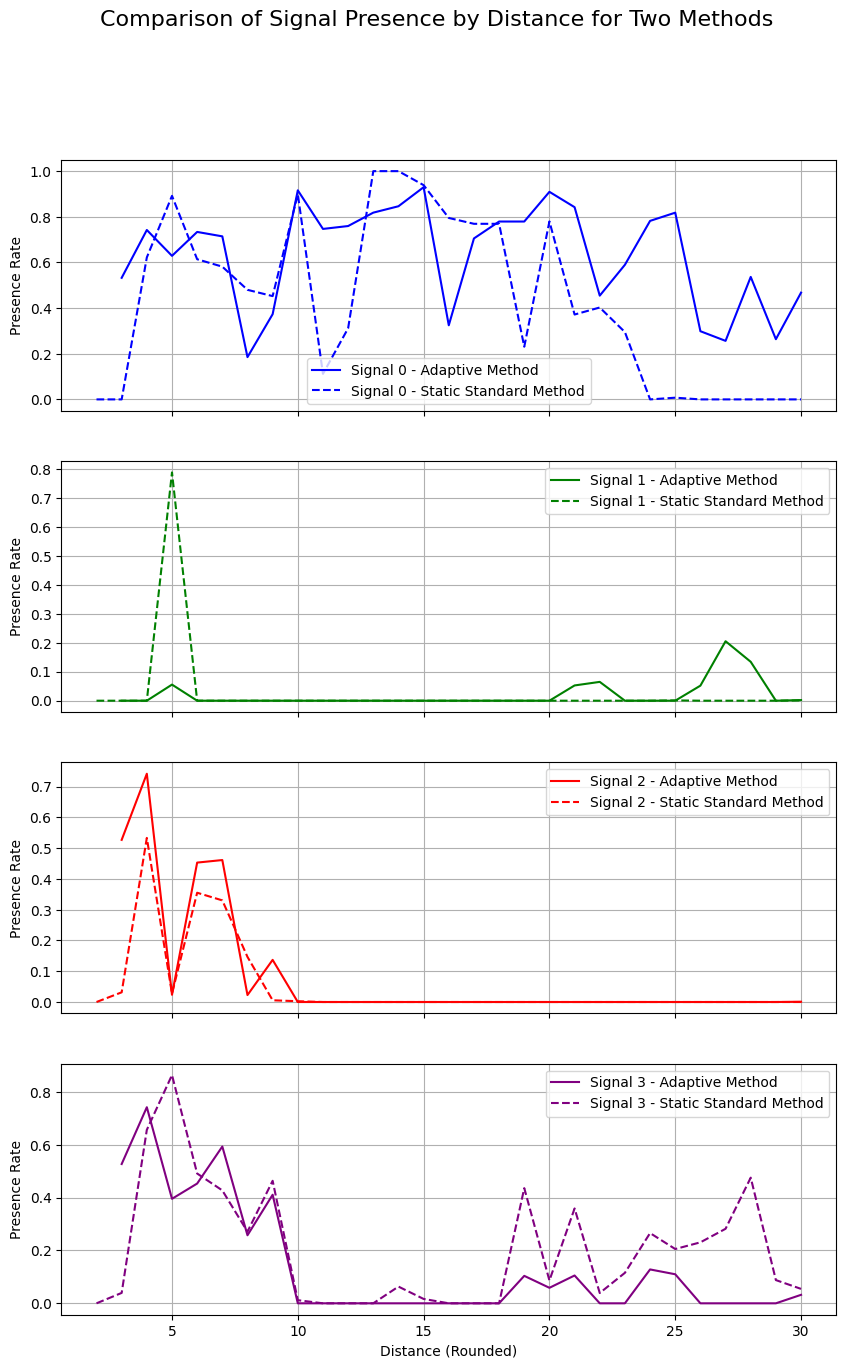

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(4, 1, figsize=(10, 15), sharex=True)
fig.suptitle('Comparison of Signal Presence by Distance for Two Methods', fontsize=16)

signals = ['signal_0','signal_1', 'signal_2', 'signal_3']
colors = ['blue', 'green', 'red','purple']
labels = ['Signal 0','Signal 1', 'Signal 2', 'Signal 3']
method_names = ['Adaptive Method', 'Static Standard Method']

# ignal presence for each signal
for i, signal in enumerate(signals):
    x_kl = np.array(otsu_signal_presence_by_distance['rounded_distance'])
    y_kl = np.array(otsu_signal_presence_by_distance[signal])
    x_standard = np.array(standard_signal_presence_by_distance['rounded_distance'])
    y_standard = np.array(standard_signal_presence_by_distance[signal])
    
    axes[i].plot(x_kl, y_kl, color=colors[i], label=f'{labels[i]} - {method_names[0]}')
    axes[i].plot(x_standard, y_standard, '--', color=colors[i], label=f'{labels[i]} - {method_names[1]}')
    axes[i].set_ylabel('Presence Rate')
    axes[i].legend(loc='best')
    axes[i].grid(True)

axes[-1].set_xlabel('Distance (Rounded)')

plt.show()

# Simulation 

In [ ]:
import pandas as pd

# Load the datasets
adaptive_df = pd.read_csv('~/Desktop/MRS_Master_Project/rosbags/simulation/processed_csv/static_otsu_adaptive_heading_exp_v3_processed.csv')

standard_df = pd.read_csv('~/Desktop/MRS_Master_Project/rosbags/simulation/processed_csv/static_static_heading_exp_v3_processed.csv')

# Drop rows with NaN distances if any
adaptive_df_clean = adaptive_df.dropna(subset=['distance_x'])
standard_df_clean = standard_df.dropna(subset=['distance_x'])

# Calculating the overall presence of each signal in both datasets
overall_presence_adaptive = adaptive_df[['signal_1', 'signal_2', 'signal_3']].mean()
overall_presence_standard = standard_df[['signal_1', 'signal_2', 'signal_3']].mean()

# Comparing the average distance for which each signal is detected
average_distance_adaptive = adaptive_df.groupby(['signal_1', 'signal_2', 'signal_3'])['distance_x'].mean().reset_index()
average_distance_standard = standard_df.groupby(['signal_1', 'signal_2', 'signal_3'])['distance_x'].mean().reset_index()

overall_presence_adaptive, overall_presence_standard, average_distance_adaptive, average_distance_standard

(signal_1    0.592739
 signal_2    0.592739
 signal_3    1.000000
 dtype: float64,
 signal_1    0.384183
 signal_2    0.392098
 signal_3    1.000000
 dtype: float64,
    signal_1  signal_2  signal_3  distance_x
 0         0         0         1   12.836584
 1         1         1         1    7.199130,
    signal_1  signal_2  signal_3  distance_x
 0         0         0         1   11.701038
 1         0         1         1    7.995741
 2         1         0         1    7.995741
 3         1         1         1    6.037778)

In [ ]:
#grouping by distance and calculating the signal presence rate

# Round the distances to the nearest integer for easier comparison
adaptive_df['rounded_distance'] = adaptive_df['distance_x'].round()

# Group by the rounded distance and calculate the mean for signal presence columns
kl_signal_presence_by_distance = adaptive_df.groupby('rounded_distance')[['signal_1', 'signal_2', 'signal_3']].mean().reset_index()

kl_signal_presence_by_distance.head()

,rounded_distance,signal_1,signal_2,signal_3
0,5.0,1.000000,1.000000,1.0
1,8.0,1.000000,1.000000,1.0
2,11.0,0.370627,0.370627,1.0
3,14.0,0.000000,0.000000,1.0


In [ ]:
standard_df['rounded_distance'] = standard_df['distance_x'].round()

standard_signal_presence_by_distance = standard_df.groupby('rounded_distance')[['signal_1', 'signal_2', 'signal_3']].mean().reset_index()

standard_signal_presence_by_distance.head()

,rounded_distance,signal_1,signal_2,signal_3
0,5.0,1.000000,1.00000,1.0
1,8.0,0.536091,0.56774,1.0
2,11.0,0.000000,0.00000,1.0
3,14.0,0.000000,0.00000,1.0


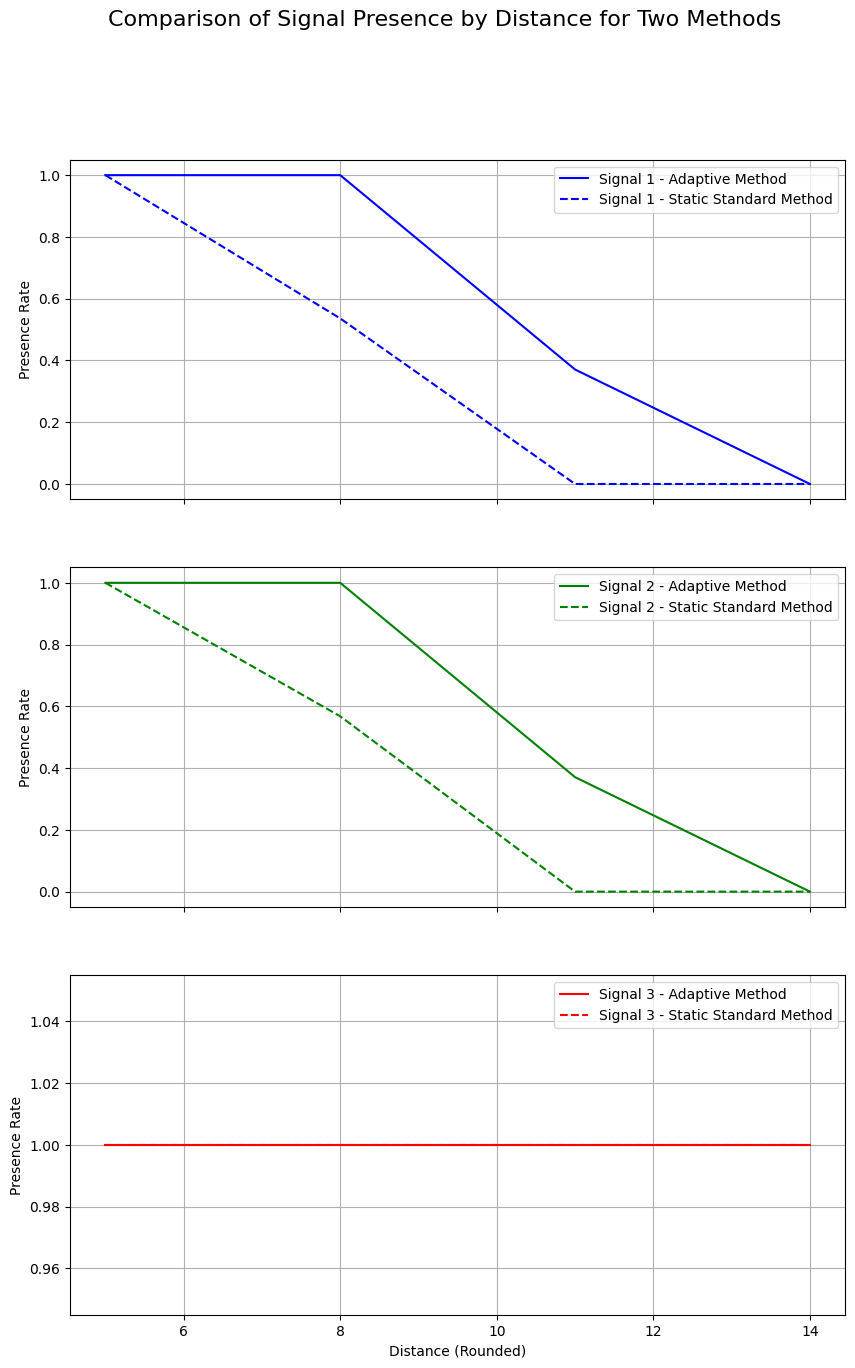

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the plotting area
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
fig.suptitle('Comparison of Signal Presence by Distance for Two Methods', fontsize=16)

# Plot settings
signals = ['signal_1', 'signal_2', 'signal_3']
colors = ['blue', 'green', 'red']
labels = ['Signal 1', 'Signal 2', 'Signal 3']
method_names = ['Adaptive Method', 'Static Standard Method']

# Plotting the signal presence for each signal
for i, signal in enumerate(signals):
    # Convert data to numpy arrays
    x_kl = np.array(kl_signal_presence_by_distance['rounded_distance'])
    y_kl = np.array(kl_signal_presence_by_distance[signal])
    x_standard = np.array(standard_signal_presence_by_distance['rounded_distance'])
    y_standard = np.array(standard_signal_presence_by_distance[signal])
    
    # Plot data
    axes[i].plot(x_kl, y_kl, color=colors[i], label=f'{labels[i]} - {method_names[0]}')
    axes[i].plot(x_standard, y_standard, '--', color=colors[i], label=f'{labels[i]} - {method_names[1]}')
    axes[i].set_ylabel('Presence Rate')
    axes[i].legend(loc='best')
    axes[i].grid(True)

axes[-1].set_xlabel('Distance (Rounded)')

plt.show()

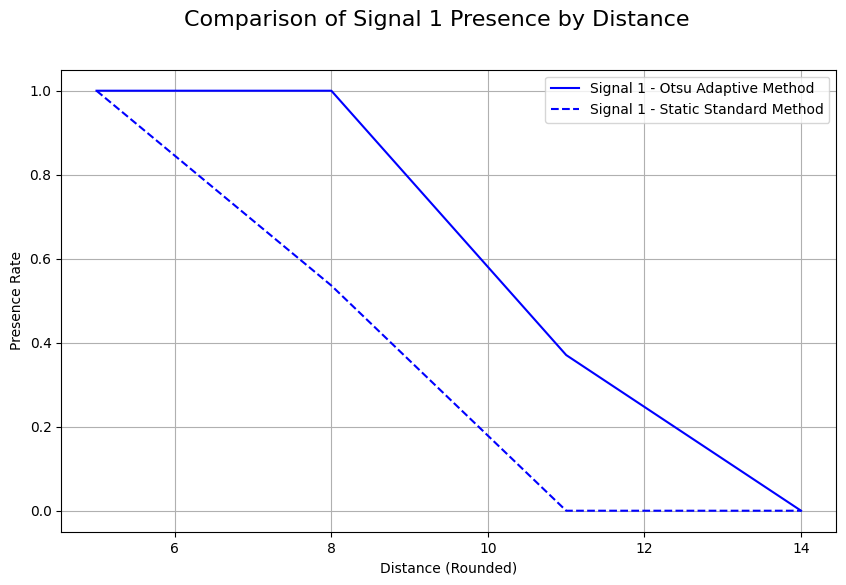

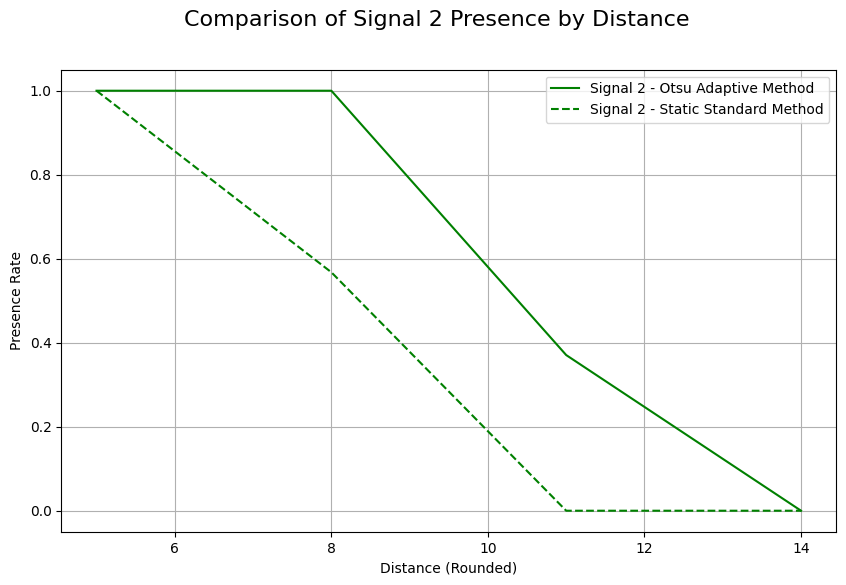

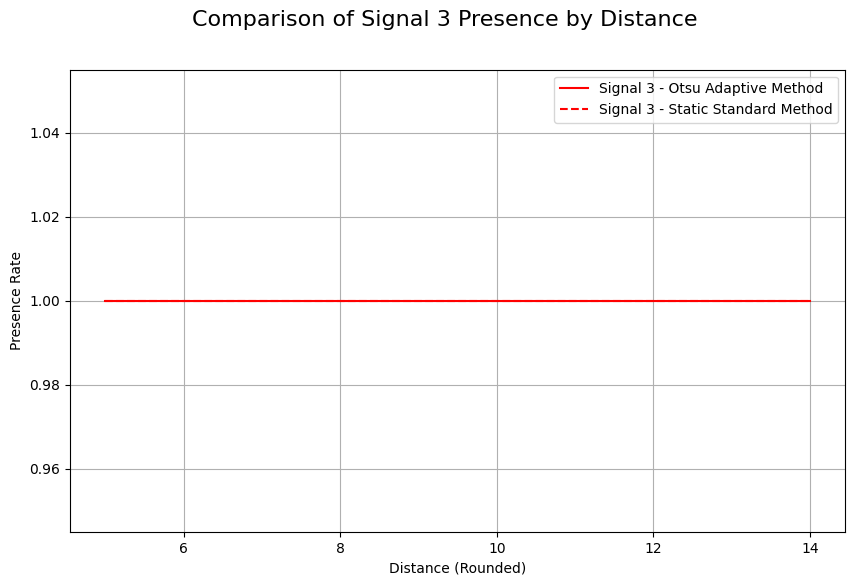

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Signals, colors, labels, and methods names setup
signals = ['signal_1', 'signal_2', 'signal_3']
colors = ['blue', 'green', 'red']
labels = ['Signal 1', 'Signal 2', 'Signal 3']
method_names = ['Otsu Adaptive Method', 'Static Standard Method']

# Iterate through each signal to create individual plots
for index, signal in enumerate(signals):
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
    fig.suptitle(f'Comparison of {labels[index]} Presence by Distance', fontsize=16)
    
    # Convert data to numpy arrays
    x_kl = np.array(kl_signal_presence_by_distance['rounded_distance'])
    y_kl = np.array(kl_signal_presence_by_distance[signal])
    x_standard = np.array(standard_signal_presence_by_distance['rounded_distance'])
    y_standard = np.array(standard_signal_presence_by_distance[signal])
    
    # Plotting data for KL Adaptive Method and Static Standard Method
    ax.plot(x_kl, y_kl, color=colors[index], label=f'{labels[index]} - {method_names[0]}')
    ax.plot(x_standard, y_standard, '--', color=colors[index], label=f'{labels[index]} - {method_names[1]}')

    # Setting labels and title
    ax.set_xlabel('Distance (Rounded)')
    ax.set_ylabel('Presence Rate')
    ax.legend(loc='best')
    ax.grid(True)
    
    # Show the plot
    plt.show()

## Plotting overall signal presence


<Figure size 1200x600 with 0 Axes>

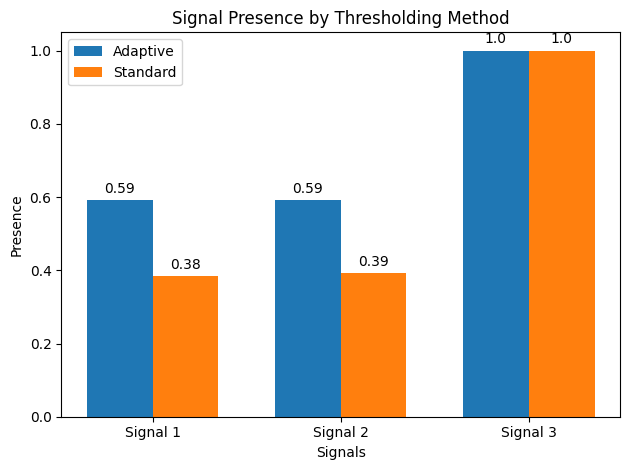

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Visualization 1: Overall Signal Presence Comparison
plt.figure(figsize=(12, 6))

# Data for plotting
labels = ['Signal 1', 'Signal 2', 'Signal 3']
adaptive_means = overall_presence_adaptive.values
standard_means = overall_presence_standard.values

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, adaptive_means, width, label='Adaptive')
rects2 = ax.bar(x + width/2, standard_means, width, label='Standard')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Signals')
ax.set_ylabel('Presence')
ax.set_title('Signal Presence by Thresholding Method')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to autolabel the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

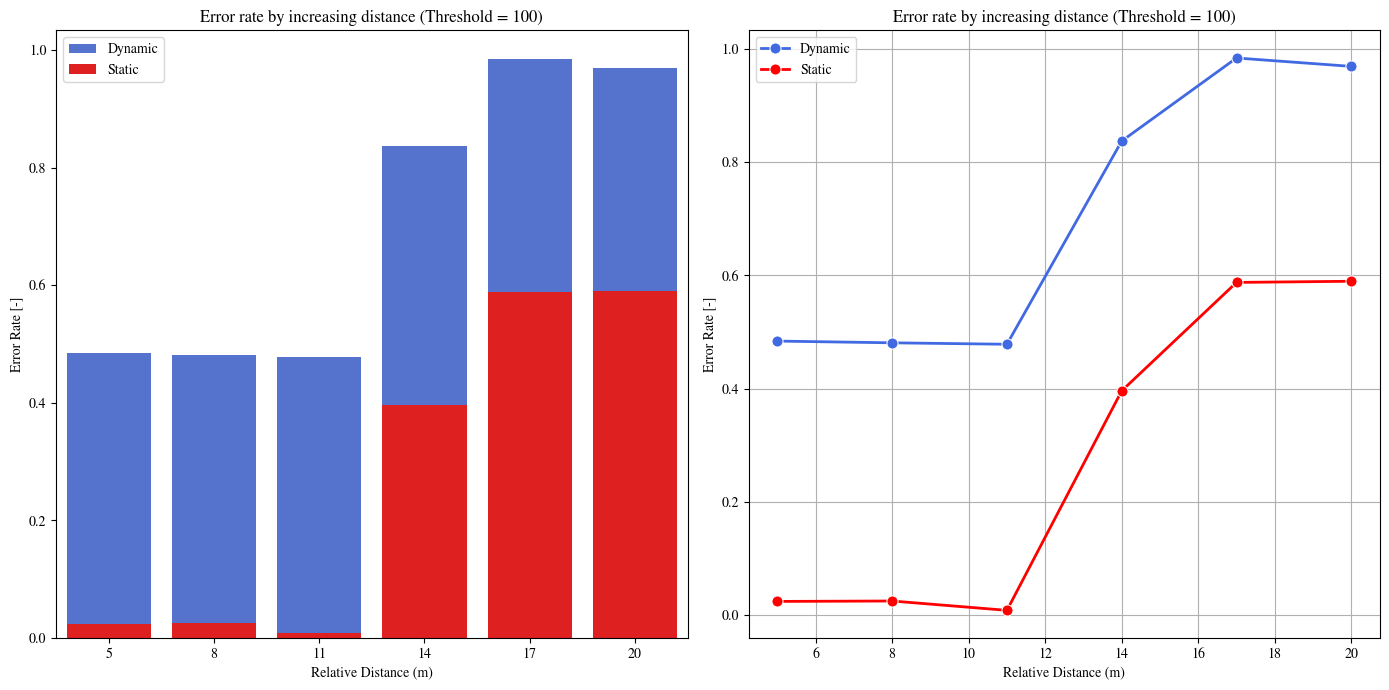

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Set the font to a serif font, like Times New Roman
#mpl.rcParams['font.family'] = 'cmu_serif'
#mpl.rcParams['mathtext.fontset'] = 'cm'
# Alternatively, for LaTeX typesetting (for truly academic appearance)
#mpl.rcParams['text.usetex'] = True
#mpl.rcdefaults()
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.figure(figsize=(14, 7))

# Bar plot
plt.subplot(1, 2, 1)
sns.barplot(data=specified_distance_summary, x='nearest_distance', y='error_rate', color='royalblue', label='Dynamic')

#Add the static data
sns.barplot(data=specified_distance_summary_static, x='nearest_distance', y='error_rate', color='red', label='Static')
plt.title('Error rate by increasing distance (Threshold = 100)')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]')

# Line plot
plt.subplot(1, 2, 2)
sns.lineplot(data=specified_distance_summary, x='nearest_distance', y='error_rate', marker='o', color='royalblue', linewidth=2, markersize=8, label='Dynamic')

#Add the static data
sns.lineplot(data=specified_distance_summary_static, x='nearest_distance', y='error_rate', marker='o', color='red', linewidth=2, markersize=8, label='Static')
plt.title('Error rate by increasing distance (Threshold = 100)')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]')
plt.grid(True)

plt.tight_layout()
plt.show()

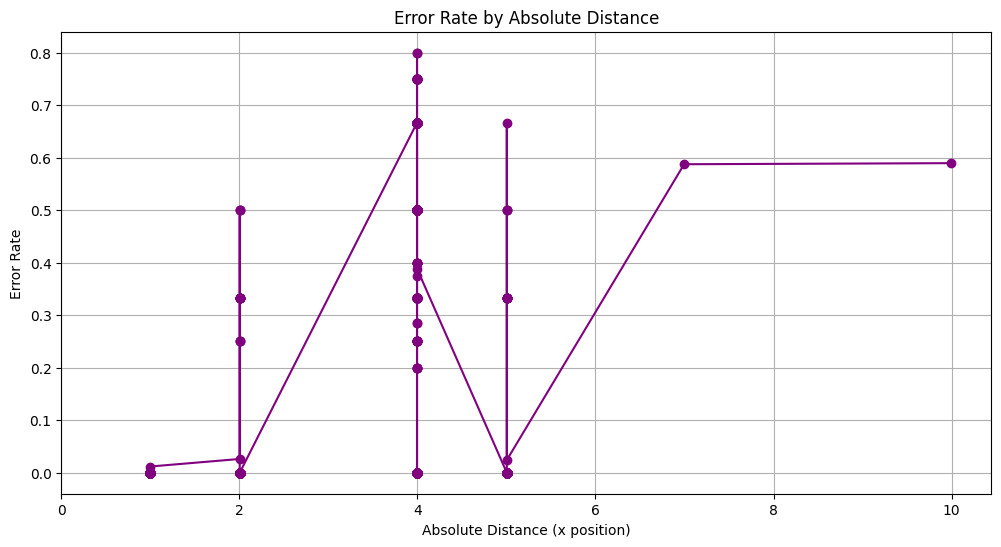

In [ ]:
#Make all distances positive
import pandas as pd
import os

import matplotlib.pyplot as plt
data['distance_x'] = data['distance_x'].abs()

# Save the cleaned data to a new CSV file
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_standard_static_cleaned.csv')

data.to_csv(cleaned_file_path, index=False)

cleaned_file_path, data.head(50)  # Return the path to the new CSV and display the first few rows of the cleaned data.



error_rate_by_abs_distance = data.groupby('distance_x')['is_error'].mean().sort_index()
# Plot error rates with absolute distances
plt.figure(figsize=(12, 6))
plt.plot(error_rate_by_abs_distance.index, error_rate_by_abs_distance.values, marker='o', linestyle='-', color='purple')
plt.title('Error Rate by Absolute Distance')
plt.xlabel('Absolute Distance (x position)')
plt.ylabel('Error Rate')
plt.grid(True)
plt.xlim(left=0)  # Ensure x-axis starts from 0
plt.show()

In [ ]:
data.head(50)  # Display the first few rows of the cleaned data.

,timestamp,distance_x,value,is_error,adjusted_distance_x
0,54.148,5.004249,0.0,0,10.004249
1,54.148,5.004249,3.0,0,10.004249
2,54.152,5.004249,2.0,0,10.004249
3,54.164,5.004249,2.0,0,10.004249
4,54.168,5.004249,0.0,0,10.004249
5,54.168,5.004249,3.0,0,10.004249
6,54.180,5.004249,0.0,0,10.004249
7,54.180,5.004249,2.0,0,10.004249
8,54.184,5.004249,3.0,0,10.004249
9,54.196,5.004249,2.0,0,10.004249


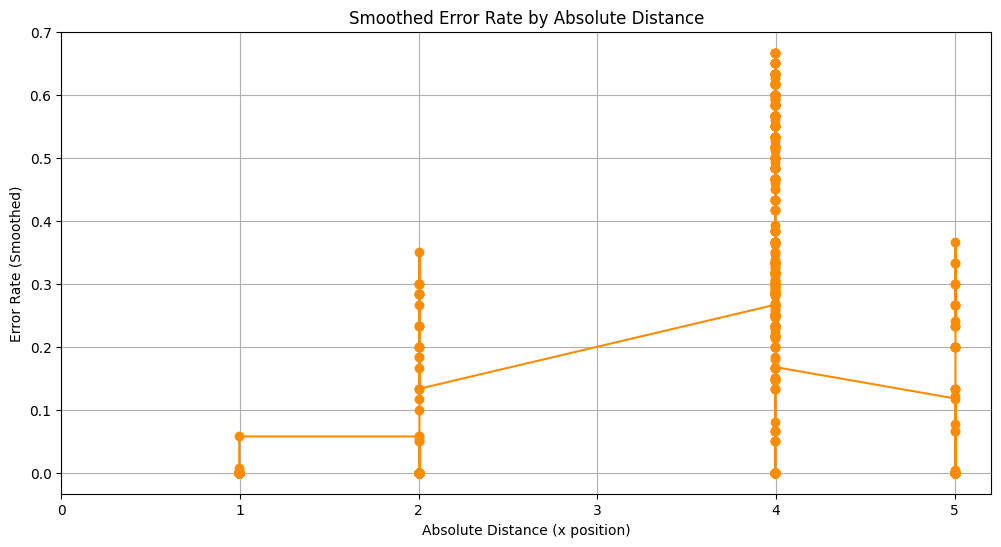

In [ ]:
# Apply a moving average to smooth the data and reduce spikes
# Choosing a window size that balances smoothness with retaining the underlying trend
window_size = 5
smoothed_error_rate_abs = error_rate_by_abs_distance.rolling(window=window_size, center=True).mean()

# Plot the smoothed error rates against absolute distances
plt.figure(figsize=(12, 6))
plt.plot(smoothed_error_rate_abs.index, smoothed_error_rate_abs.values, marker='o', linestyle='-', color='darkorange')
plt.title('Smoothed Error Rate by Absolute Distance')
plt.xlabel('Absolute Distance (x position)')
plt.ylabel('Error Rate (Smoothed)')
plt.grid(True)
plt.xlim(left=0)  # Ensure x-axis starts from 0
plt.show()

0.9957509721555614


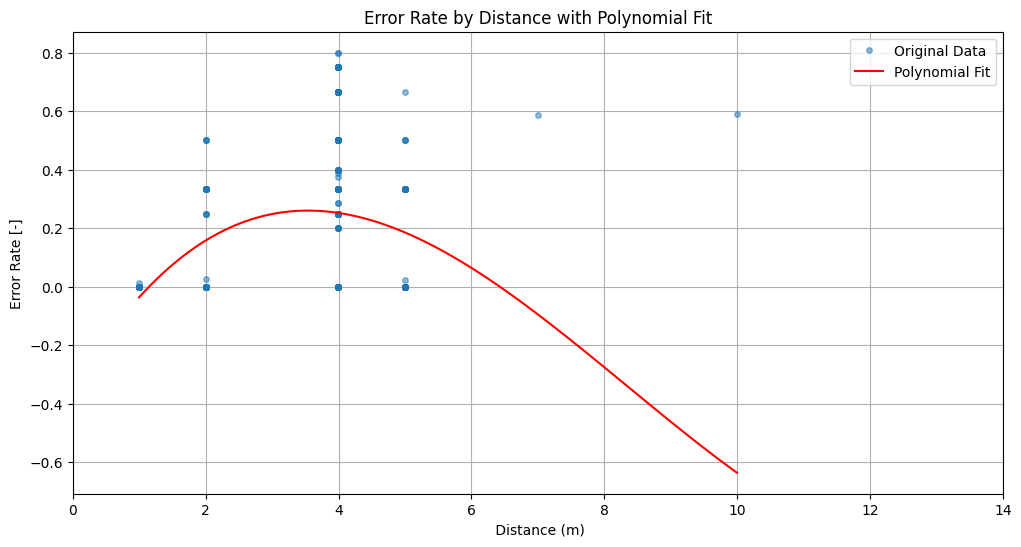

In [ ]:
from numpy import polyfit, poly1d
import numpy as np


data['adjusted_distance_x'] = data['distance_x'] + 0
# Recalculate error rates with the adjusted distances
error_rate_by_adjusted_distance = data.groupby('adjusted_distance_x')['is_error'].mean().sort_index()

left_bound = error_rate_by_adjusted_distance.index.min()
print(left_bound)


# Fit a polynomial regression to the adjusted data
coef_adjusted = polyfit(error_rate_by_adjusted_distance.index, error_rate_by_adjusted_distance.values, 3)
poly_adjusted = poly1d(coef_adjusted)

# Generate x and y values for the polynomial fit over the adjusted distances
x_poly_adjusted = np.linspace(error_rate_by_adjusted_distance.index.min(), error_rate_by_adjusted_distance.index.max(), 100)
y_poly_adjusted = poly_adjusted(x_poly_adjusted)

# Plot the original data and the polynomial regression line with adjusted distances
plt.figure(figsize=(12, 6))
plt.plot(error_rate_by_adjusted_distance.index, error_rate_by_adjusted_distance.values, 'o', markersize=4, alpha=0.5, label='Original Data')
plt.plot(x_poly_adjusted, y_poly_adjusted, 'r-', label='Polynomial Fit')
plt.title('Error Rate by Distance with Polynomial Fit')
plt.xlabel(' Distance (m)')
plt.ylabel('Error Rate [-]')
plt.legend()
plt.grid(True)
plt.xlim(left_bound)  # Adjust the left bound to reflect the distance adjustment
#More descriptive x-limit
plt.xlim(left=0, right=14)
plt.show()

